This notebook is used to evalute the 4 algorithms against the ground truth and produce corresponding figures. 

File Structure as follows on Google Collab:

*   content/
  *   dlib_annotated.json
  *   faces_annotated.json
  *   mtcnn_annotated.json
  *   retinaface_annotated.json
  *   violajones_annotated.json
  *   dataset/
      *   {48 photos from 5025 dataset}


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt


def file_to_json(filename):
  with open(filename) as json_file: 
    
      data = json.load(json_file) 
  return data

In [4]:
dlib_annotated = file_to_json('/content/dlib_annotated.json')
faces_annotated = file_to_json('/content/faces_annotated.json')
mtcnn_annotated = file_to_json('/content/mtcnn_annotated.json')
retinanet_annotated = file_to_json('/content/retinaface_annotated.json')
violajones_annotated = file_to_json('/content/violajones_annotated.json')


The *compare()* function below compares the predicted coordinates for the algorithms and normalises each difference with the distance between the eyes for the specific face. 

Each error difference is placed in its own corresponding dictionary

In [5]:
def compare(groundtruth,algorithm):
  difference = {}
  for id in range(48):
    id=str(id)
    alg = (algorithm[id]["landmarks"])
    ground = (groundtruth[id]["landmarks"])
    norm_factor =(np.linalg.norm(np.array(ground["right_eye"])-np.array(ground["left_eye"])))

    dist_left_eye = (np.linalg.norm(np.array(alg["left_eye"])-np.array(ground["left_eye"])))/ norm_factor
    dist_right_eye = (np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["right_eye"])))/ norm_factor
    dist_nose = (np.linalg.norm(np.array(alg["nose"])-np.array(ground["nose"])))/ norm_factor
    dist_left_mouth = (np.linalg.norm(np.array(alg["left_mouth"])-np.array(ground["left_mouth"])))/ norm_factor
    dist_right_mouth = (np.linalg.norm(np.array(alg["right_mouth"])-np.array(ground["right_mouth"])))/ norm_factor

    # print("ID:",id)
    # print("left_eye_distance:",dist_left_eye,"\tright_eye_distance:",dist_right_eye)
    # print("nose_distance:",dist_nose)
    # print("left_mouth_distance:",dist_left_mouth,"\tright_mouth_distance:",dist_right_mouth)
    # print("")
    difference[id] = {"left_eye_distance":dist_left_eye*100, "right_eye_distance":dist_right_eye*100,"nose_distance":dist_nose*100,"left_mouth_distance":dist_left_mouth*100,"right_mouth_distance":dist_right_mouth*100}
  return difference






*compare_single()* performs the same task as compare but does it for only a single images predictions for a single algorithm

In [6]:
def compare_single(groundtruth,algorithm):
  difference = {}
 
  alg = (algorithm["landmarks"])
  ground = (groundtruth["landmarks"])
  norm_factor =(np.linalg.norm(np.array(ground["right_eye"])-np.array(ground["left_eye"])))

  dist_left_eye = (np.linalg.norm(np.array(alg["left_eye"])-np.array(ground["left_eye"])))/ norm_factor
  dist_right_eye = (np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["right_eye"])))/ norm_factor
  dist_nose = (np.linalg.norm(np.array(alg["nose"])-np.array(ground["nose"])))/ norm_factor
  dist_left_mouth = (np.linalg.norm(np.array(alg["left_mouth"])-np.array(ground["left_mouth"])))/ norm_factor
  dist_right_mouth = (np.linalg.norm(np.array(alg["right_mouth"])-np.array(ground["right_mouth"])))/ norm_factor

  # print("ID:",id)
  # print("left_eye_distance:",dist_left_eye,"\tright_eye_distance:",dist_right_eye)
  # print("nose_distance:",dist_nose)
  # print("left_mouth_distance:",dist_left_mouth,"\tright_mouth_distance:",dist_right_mouth)
  # print("")
  difference = {"left_eye_distance":dist_left_eye*100, "right_eye_distance":dist_right_eye*100,"nose_distance":dist_nose*100,"left_mouth_distance":dist_left_mouth*100,"right_mouth_distance":dist_right_mouth*100}
  return difference

In [7]:
dlib_diff = compare(faces_annotated,dlib_annotated)
mtcnn_diff = compare(faces_annotated,mtcnn_annotated)
retinaface_diff = compare(faces_annotated,retinanet_annotated)

The *show_face_comparison()* is a method which places the predictions of each algorithms landmarks on the face along with the corresponding ground truth

In [8]:

import cv2
from google.colab.patches import cv2_imshow
def show_face_comparison(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>=24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")
  
  x = int(faces_annotated[id]["bounding_box"]["x"])
  y = int(faces_annotated[id]["bounding_box"]["y"])
  w = int(faces_annotated[id]["bounding_box"]["w"])
  h = int(faces_annotated[id]["bounding_box"]["h"])


  landmarks = faces_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(dlib_annotated[id]["bounding_box"]["x"])
  y = int(dlib_annotated[id]["bounding_box"]["y"])
  w = int(dlib_annotated[id]["bounding_box"]["w"])
  h = int(dlib_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = dlib_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
    
  #-------------------------------------------------------------------------------

  x = int(retinanet_annotated[id]["bounding_box"]["x"])
  y = int(retinanet_annotated[id]["bounding_box"]["y"])
  w = int(retinanet_annotated[id]["bounding_box"]["w"])
  h = int(retinanet_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = retinanet_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(mtcnn_annotated[id]["bounding_box"]["x"])
  y = int(mtcnn_annotated[id]["bounding_box"]["y"])
  w = int(mtcnn_annotated[id]["bounding_box"]["w"])
  h = int(mtcnn_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = mtcnn_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 255, 0), -1)

  #-------------------------------------------------------------------------------


  img = np.zeros((64,128,3), np.uint8)


  font                   = cv2.FONT_HERSHEY_SIMPLEX
  bottomLeftCornerOfText = (10,10)
  fontScale              = 0.35
  fontColor              = (255,255,255)
  lineType               = 0

  cv2.putText(img,'GroundTruth:', (10,10), font, fontScale,fontColor,lineType)
  cv2.putText(img,'MTCNN:', (10,25), font, fontScale,fontColor,lineType)
  cv2.putText(img,'HOG:', (10,40), font, fontScale,fontColor,lineType)
  cv2.putText(img,'RetinaFace:', (10,55), font, fontScale,fontColor,lineType)

  cv2.circle(img, (90, 6), 4, (0, 255, 0), -1)
  cv2.circle(img, (90, 21), 4, (255, 255, 0), -1)
  cv2.circle(img, (90, 36), 4, (0, 0, 255), -1)
  cv2.circle(img, (90, 51), 4, (255, 0, 0), -1)

  # cv2_imshow(img)
  # cv2_imshow(image)
  s_img = img
  l_img = image

  l_img[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
  cv2_imshow(l_img)


*show_face_comparison_viola()* places the Viola-Jones algorithms predicted bounding box against the ground truth on a face

In [9]:
def show_face_comparison_viola(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>=24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")

  for face_id in violajones_annotated[id]:
    box = violajones_annotated[id][face_id]
    x = int(box["x"])
    y = int(box["y"])
    w = int(box["w"])
    h = int(box["h"])
    print(x,y,w,h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (100, 255, 255), 2)


  x = int(faces_annotated[id]["bounding_box"]["x"])
  y = int(faces_annotated[id]["bounding_box"]["y"])
  w = int(faces_annotated[id]["bounding_box"]["w"])
  h = int(faces_annotated[id]["bounding_box"]["h"])


  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)



  # cv2_imshow(image)


  img = np.zeros((32,128,3), np.uint8)


  font                   = cv2.FONT_HERSHEY_SIMPLEX
  bottomLeftCornerOfText = (10,10)
  fontScale              = 0.35
  fontColor              = (255,255,255)
  lineType               = 0

  cv2.putText(img,'GroundTruth:', (10,10), font, fontScale,fontColor,lineType)
  cv2.putText(img,'Viola-Jones:', (10,25), font, fontScale,fontColor,lineType)


  cv2.circle(img, (90, 6), 4, (0, 255, 0), -1)
  cv2.circle(img, (90, 21), 4, (100, 255, 255), -1)

  # cv2_imshow(img)
  # cv2_imshow(image)
  s_img = img
  l_img = image

  l_img[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
  cv2_imshow(l_img)




*show_face_comparison_mtcnn()* shows the altered images results and original images results on the face, with the corresponding ground truth

In [10]:
def show_face_comparison_mtcnn(id,sorry):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")
  
  x = int(faces_annotated[id]["bounding_box"]["x"])
  y = int(faces_annotated[id]["bounding_box"]["y"])
  w = int(faces_annotated[id]["bounding_box"]["w"])
  h = int(faces_annotated[id]["bounding_box"]["h"])


  landmarks = faces_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

  #-------------------------------------------------------------------------------
  
  x = int(mtcnn_annotated[id]["bounding_box"]["x"])
  y = int(mtcnn_annotated[id]["bounding_box"]["y"])
  w = int(mtcnn_annotated[id]["bounding_box"]["w"])
  h = int(mtcnn_annotated[id]["bounding_box"]["h"])

  landmarks = mtcnn_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

  

  #-------------------------------------------------------------------------------

  x = int(sorry["bounding_box"]["x"])
  y = int(sorry["bounding_box"]["y"])
  w = int(sorry["bounding_box"]["w"])
  h = int(sorry["bounding_box"]["h"])

  landmarks = sorry["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 255, 0), -1)

  #-------------------------------------------------------------------------------


  img = np.zeros((64,128,3), np.uint8)


  font                   = cv2.FONT_HERSHEY_SIMPLEX
  bottomLeftCornerOfText = (10,10)
  fontScale              = 0.35
  fontColor              = (255,255,255)
  lineType               = 0

  cv2.putText(img,'GroundTruth:', (10,10), font, fontScale,fontColor,lineType)
  cv2.putText(img,'MTCNN**:', (10,25), font, fontScale,fontColor,lineType)
  cv2.putText(img,'MTCNN:', (10,40), font, fontScale,fontColor,lineType)

  cv2.circle(img, (90, 6), 4, (0, 255, 0), -1)
  cv2.circle(img, (90, 21), 4, (255, 255, 0), -1)
  cv2.circle(img, (90, 36), 4, (255, 0, 0), -1)
  

  # cv2_imshow(img)
  # cv2_imshow(image)
  s_img = img
  l_img = image

  l_img[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
  cv2_imshow(l_img)

*count_diff()* counts the number of error differences between both the groups for each algorithm at different magnitudes. It is used to create the errors at thresholds graph

In [11]:
import numpy as np

def count_diff(algorithm,threshold):
  # bucket_left_eye = {}
  # bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100]
  l_m={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  l={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  l_r={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  m_count = 0
  r_count = 0
  for id in algorithm:
    face = (algorithm[id])
    for feature in face:
      value = face[feature]
      if value >= threshold:
        l[feature].append(value)
        id = int(id)
        if (id>=0 and id<12 or id>=24 and id<36):
          m_count += 1
          l_m[feature].append(value)
          
        else:
          r_count += 1
          l_r[feature].append(value)
      # else:
      #   continue:
      #    #print(id, value, feature)
          
  return m_count,r_count,l_m,l_r,l

In [12]:
miniority_count, represented_count,dlib_error_list_m,dlib_error_list_r,dlib_error_list = count_diff(dlib_diff,0)
print("DLIB",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,mtcnn_error_list_m,mtcnn_error_list_r,mtcnn_error_list = count_diff(mtcnn_diff,0)
print("MTCNN",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,retinaface_error_list_m,retinaface_error_list_r,retinaface_error_list = count_diff(retinaface_diff,0)
print("RetinaFace",miniority_count, represented_count,miniority_count-represented_count)

DLIB 120 120 0
MTCNN 120 120 0
RetinaFace 120 120 0


*histogram()* creates a histogram of error differences for an algorithm

In [13]:
def histogram(listforfeature, nameofhistogram):
  
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  left_eye_distance = (listforfeature["left_eye_distance"])
  right_eye_distance = (listforfeature["right_eye_distance"])
  nose_distance = (listforfeature["nose_distance"])
  left_mouth_distance = (listforfeature["left_mouth_distance"])
  right_mouth_distance = (listforfeature["right_mouth_distance"])

  bins = np.linspace(0, 15, 16)
  #print(bins)

  plt.hist([left_eye_distance,right_eye_distance,nose_distance,left_mouth_distance,right_mouth_distance], bins, label=['left_eye_distance', 'right_eye_distance','nose_distance','left_mouth_distance','right_mouth_distance'])
  plt.xticks(bins, fontsize = 20)
  plt.yticks(np.linspace(0, 15, 16),fontsize=20)
  title = "Histogram of Error Difference for " + nameofhistogram
  plt.title(title, fontsize=30)
  plt.xlabel('Error Difference',fontsize=30)
  plt.ylabel('Frequency',fontsize=30)
  plt.legend(loc='upper right',prop={'size': 28})

  plt.show()

*errorThreshold()* creates the error threshold graph for both groups

In [14]:
#plt.plot(min_list, rep_list, 'r')
def __errorThreshold(min_list,rep_list,name):
  plt.figure(figsize=(20,10))
  plt.style.use('fivethirtyeight')
  min_plt, = plt.plot( [0,1,2,3,4,5,6,7,8,9,10], min_list,color='g',marker = '*',label = "Underrepresented",linewidth = 2)
  rep_plt, = plt.plot([0,1,2,3,4,5,6,7,8,9,10],rep_list,color = 'r' , marker = '*',label= "Represented",linewidth = 2)
  plt.xticks([0,1,2,3,4,5,6,7,8,9,10],fontsize=20)
  plt.yticks(fontsize=20)
  title = "Frequency of Errors at Different Error Thresholds for " + name
  plt.title(title,fontsize=30)
  plt.xlabel('Error Thresholds',fontsize=30)
  plt.ylabel('Number of Errors',fontsize=30)
  plt.legend(handles = [min_plt,rep_plt] ,loc='upper right',prop={'size': 28})
  plt.show()

In [15]:
def errorThreshold(algorithm,nameofalg):
  min_list = []
  rep_list=[]
  for x in range(11):
    #print(x)
    m, r,_,_,_ = count_diff(algorithm,x)
    # print("DLIB",miniority_count, represented_count,miniority_count-represented_count)
    min_list.append(m)
    rep_list.append(r)


  __errorThreshold(min_list,rep_list,nameofalg)

*max_error()* and *min_error()* output the worst performing face on average for all the landmarks and best performing face on average for all the landmarks

In [16]:
def max_error(algortihm):
  max = 0
  for x in algortihm:
    total =0
    for keys in algortihm[x].values():
      total += (keys)
    total = total/5  #remove this for max error instead of max average
    # print(total)
    if total >max:
      max = total
      id = x
  return id

def min_error(algortihm):
  min = 1000
  for x in algortihm:
    total =0
    for keys in algortihm[x].values():
      total += (keys)
    total = total/5  #remove this for max error instead of max average
    # print(total)
    if total <min:
      min = total
      id = x
  return id


*histogramSpecific()* creates a histogram for a specific feature between both groups

In [17]:
def histogramSpecific(feature, nameofhistogram, error_list_m,error_list_r):
  import numpy as np
  import matplotlib.pyplot as plt
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  # left_eye_distance = (listforfeature["left_eye_distance"])
  # right_eye_distance = (listforfeature["right_eye_distance"])
  # nose_distance = (listforfeature["nose_distance"])
  # left_mouth_distance = (listforfeature["left_mouth_distance"])
  # right_mouth_distance = (listforfeature["right_mouth_distance"])

  m = error_list_m[feature]
  r = error_list_r[feature]

  # # retinaface_left_eye_m = []
  # # retinaface_left_eye_r = []

  # dlib_left_eye_m = dlib_error_list_m[feature]
  # dlib_left_eye_r = dlib_error_list_r[feature]

  # mtcnn_left_eye_m = mtcnn_error_list_m[feature]
  # mtcnn_left_eye_r = mtcnn_error_list_r[feature]

  # # mtcnn_left_eye_m = []
  # # mtcnn_left_eye_r = []

  # left_eye_m = retinaface_left_eye_m + dlib_left_eye_m + mtcnn_left_eye_m
  # left_eye_r = retinaface_left_eye_r + dlib_left_eye_r + mtcnn_left_eye_r
  bins = np.linspace(0, 14, 8)
  # #print(bins)
  
  name = feature.split("_")[0]
  if name != "nose":
    name = name + feature.split("_")[1]
  plt.hist([m,r], bins,label=["Underrepresented","Represented"])

  # plt.hist([left_eye_m], bins,label=[name + "minority"],alpha = 0.5)
  # plt.hist([left_eye_r], bins,label=[name + "represented"],alpha = 0.5)

  plt.xticks(bins,fontsize=20)
  plt.yticks(np.linspace(0, 15,16),fontsize=20)
  title = "Histogram of Error difference for "+nameofhistogram 
  plt.title(title,fontsize=30)
  plt.xlabel('Error Difference',fontsize=30)
  plt.ylabel('Frequency',fontsize=30)
  plt.legend(loc='upper right',prop={'size': 28})
  plt.show()


*bb_intersection_over_union()* calculates the intersection over union for ground truth and predicted bounding boxes

In [18]:
def bb_intersection_over_union(a, b):
	

  a[2] = a[0] + a[2]
  a[3] = a[1] + a[3]

  b[2] = b[0] + b[2]
  b[3] = b[1] + b[3]

  boxA = a
  boxB = b

  xA = max(boxA[0], boxB[0])
  yA = max(boxA[1], boxB[1])
  xB = min(boxA[2], boxB[2])
  yB = min(boxA[3], boxB[3])
  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

  boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
  boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

  iou = interArea / float(boxAArea + boxBArea - interArea)

  return iou*100

In [19]:
def overlap(algorithm):
  result = []
  for x in range(48):
    x=str(x)

    box = faces_annotated[x]["bounding_box"]
    rect1 = [box["x"],box["y"],box["w"],box["h"]]
    box = algorithm[x]["bounding_box"]
    rect2 = [box["x"],box["y"],box["w"],box["h"]]
    
    answer = bb_intersection_over_union(rect1,rect2)
    result.append(answer)
  return result

In [20]:
def overlap_viola(algorithm):
  violajones_overlap = []

  for x in range(48):
    x=str(x)

    box = faces_annotated[x]["bounding_box"]
    rect1 = [box["x"],box["y"],box["w"],box["h"]]
    result = []
    for y in algorithm[x]:
      y=str(y)
      box = algorithm[x][y]
      rect2 = [box["x"],box["y"],box["w"],box["h"]]
  
      answer = bb_intersection_over_union(rect1,rect2)
      result.append(answer)
      # print(x,y)

    violajones_overlap.append(max(result))
  return (violajones_overlap)

*split_m_r()* splits the results of the bounding boxes between both groups

*split_diff_m_r()* splits the error metric dictionaries by group

In [21]:
def split_m_r(dataset):
  m = []
  r = []
  for x,value in enumerate(dataset):
    if x>=0 and x<12 or x>=24 and x<36:
      m.append(value)
    else:
      r.append(value)
  return m,r

def split_diff_m_r(alg):
  m={}
  r={}
  for x in (alg):
    x=int(x)
    if x>=0 and x<12 or x>=24 and x<36:
      x=str(x)
      m[x]=alg[x]
    else:
      x=str(x)
      r[x]=alg[x]
  return m,r


*average_diff()* calculates the average difference across landmarks and groups

In [22]:
def average_diff(algorithm):
  m=0
  r=0
  mtle=0
  mtre=0
  mtn=0
  mtlm=0
  mtrm=0
  rtle=0
  rtre=0
  rtn=0
  rtlm=0
  rtrm=0


  for x in (algorithm):
   
    
    
    record = (algorithm[x])
    le = record["left_eye_distance"]
    re = record["right_eye_distance"]
    n = record["nose_distance"]
    lm = record["left_mouth_distance"]
    rm = record["right_mouth_distance"]


    t=(le+re+n+lm+rm)/5
    x=int(x)
    
    if (x>=0 and x<12 or x>=24 and x<36):
      m += t
      mtle+=le
      mtre+=re
      mtn+=n
      mtlm+=lm
      mtrm+=rm
    else:
      r += t
      rtle+=le
      rtre+=re
      rtn+=n
      rtlm+=lm
      rtrm+=rm

  print("\nAverage Underrepresented:")
  print("left_eye_distance:",mtle/24)
  print("right_eye_distance:",mtre/24)
  print("nose_distance:",mtn/24)
  print("left_mouth_distance:",mtlm/24)
  print("right_mouth_distance:",mtrm/24)

  print("\nAverage Represented:")
  print("left_eye_distance:",rtle/24)
  print("right_eye_distance:",rtre/24)
  print("nose_distance:",rtn/24)
  print("left_mouth_distance:",rtlm/24)
  print("right_mouth_distance:",rtrm/24)

  return (m/24,r/24)
  # print(dlib_diff["9"])

In [23]:
def average(setvalue,difference):
  left_eye=0
  right_eye=0
  nose=0
  left_mouth=0
  right_mouth=0

  for x in setvalue:

    x = str(x)
    left_eye+=difference[x]["left_eye_distance"]
    right_eye+=difference[x]["right_eye_distance"]
    nose+=difference[x]["nose_distance"]
    left_mouth+=difference[x]["left_mouth_distance"]
    right_mouth+=difference[x]["right_mouth_distance"]

  # print("photos:",start,"-", end)
  # print("left_eye_distance:",left_eye/len(setvalue),"\tright_eye_distance:",right_eye/len(setvalue))
  # print("nose_distance:",nose/len(setvalue))
  # print("left_mouth_distance:",left_mouth/len(setvalue),"\tright_mouth_distance:",right_mouth/len(setvalue))
  # print("")

  return left_eye/len(setvalue),right_eye/len(setvalue),nose/len(setvalue),left_mouth/len(setvalue),right_mouth/len(setvalue)

  





*histogram_bounding()* creates the combined histogram for every algorithms 48 faces

In [24]:
def histogram_bounding(violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap):
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))



  bins = np.linspace(0, 100, 26)
  #print(bins)

  plt.hist([violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap], bins,label=["Viola and Jones","HOG","MTCNN","RetinaFace"])
  # plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
  # plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
  # plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
  # plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
  plt.xticks(np.linspace(0, 100, 26),fontsize=20)
  plt.yticks(fontsize=20)
  title = "Algortihm Bounding Boxes Overlap with Groundtruth"
  plt.title(title,fontsize=30)
  plt.xlabel('Overlapping %',fontsize=30)
  plt.ylabel('Frequency',fontsize=30)
  plt.legend(loc='upper left',prop={'size': 28})
  plt.show()

*histogram_overlap_mr()* creates the histogram for the specific algorithms for both groups

In [25]:
def histogram_overlap_mr(m,r,name):
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))



  bins = np.linspace(0, 100, 26)
  #print(bins)

  plt.hist([m,r], bins,label=["Underrepresented","Represented"])
  # plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
  # plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
  # plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
  # plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
  plt.xticks(np.linspace(0, 100, 26),fontsize=20)
  plt.yticks(fontsize=20)
  title = name + " Bounding Box Accuracy"
  plt.title(title,fontsize=30)
  plt.xlabel('Overlapping %',fontsize=30)
  plt.ylabel('Frequency',fontsize=30)
  plt.legend(loc='upper left',prop={'size': 28})
  plt.show()

*standarddeviation()* calculates the standard deviation between 4 subsets of the datasets results for each algorithm

In [26]:
def standarddeviation(alg,set_0,set_1,set_2,set_3):
  sd = {"left_eye":[],"right_eye":[],"nose":[],"left_mouth":[],"right_mouth":[]}
  le,re,n,lm,rm  = average(set_0,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)
  le,re,n,lm,rm  = average(set_1,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)
  le,re,n,lm,rm  = average(set_2,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)
  le,re,n,lm,rm  = average(set_3,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)

  sd["left_eye"]  = [np.std(sd["left_eye"]),np.average(sd["left_eye"])]
  sd["right_eye"] = [np.std(sd["right_eye"]),np.average(sd["right_eye"])]
  sd["nose"] = [np.std(sd["nose"]),np.average(sd["nose"])]
  sd["left_mouth"] = [np.std(sd["left_mouth"]),np.average(sd["left_mouth"])]
  sd["right_mouth"] = [np.std(sd["right_mouth"]),np.average(sd["right_mouth"])]
  
  print("left_eye_distance:",sd["left_eye"][1],"+/-",sd["left_eye"][0],"\tright_eye_distance:",sd["right_eye"][1],"+/-",sd["right_eye"][0])
  print("nose_distance:",sd["nose"][1],"+/-",sd["nose"][0])
  print("left_mouth_distance:",sd["left_mouth"][1],"+/-",sd["left_mouth"][0],"\tright_mouth_distance:",sd["right_mouth"][1],"+/-",sd["right_mouth"][0])
  print("")
  return sd

*extreme()* outputs image id's that have an error larger than a specific threshold for a specific feature

In [27]:
def extreme(alg,feature,threshold):
  for x in alg:
    r = (alg[x])
    if r[feature] > threshold:
      print(feature,x)
  print("----------------------------")


# The Figures
The rest of the notebook runs the methods to generate the figures

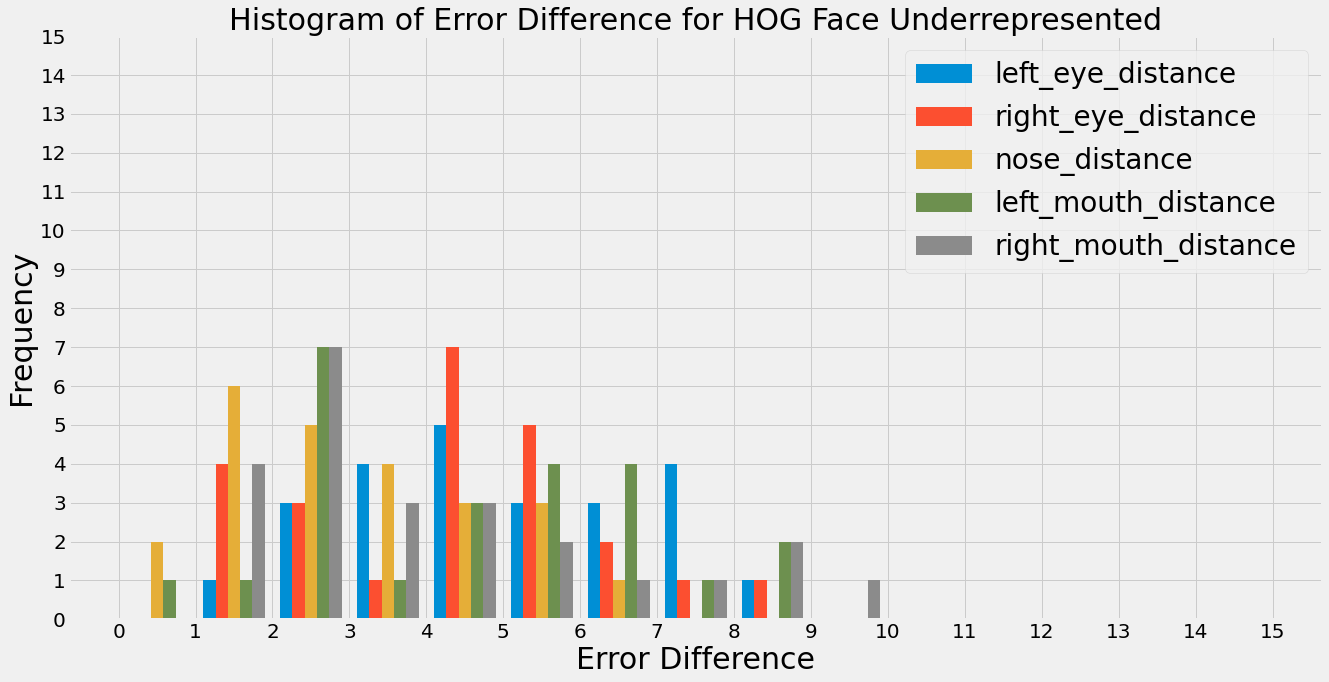

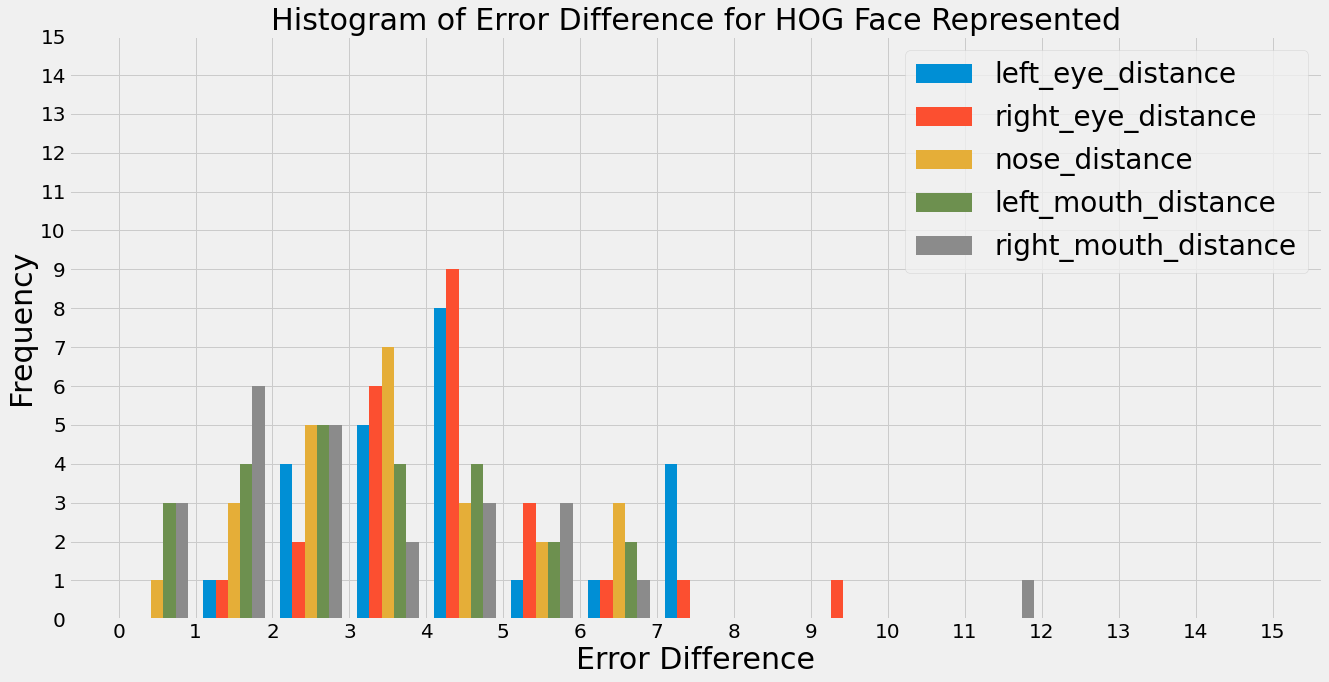

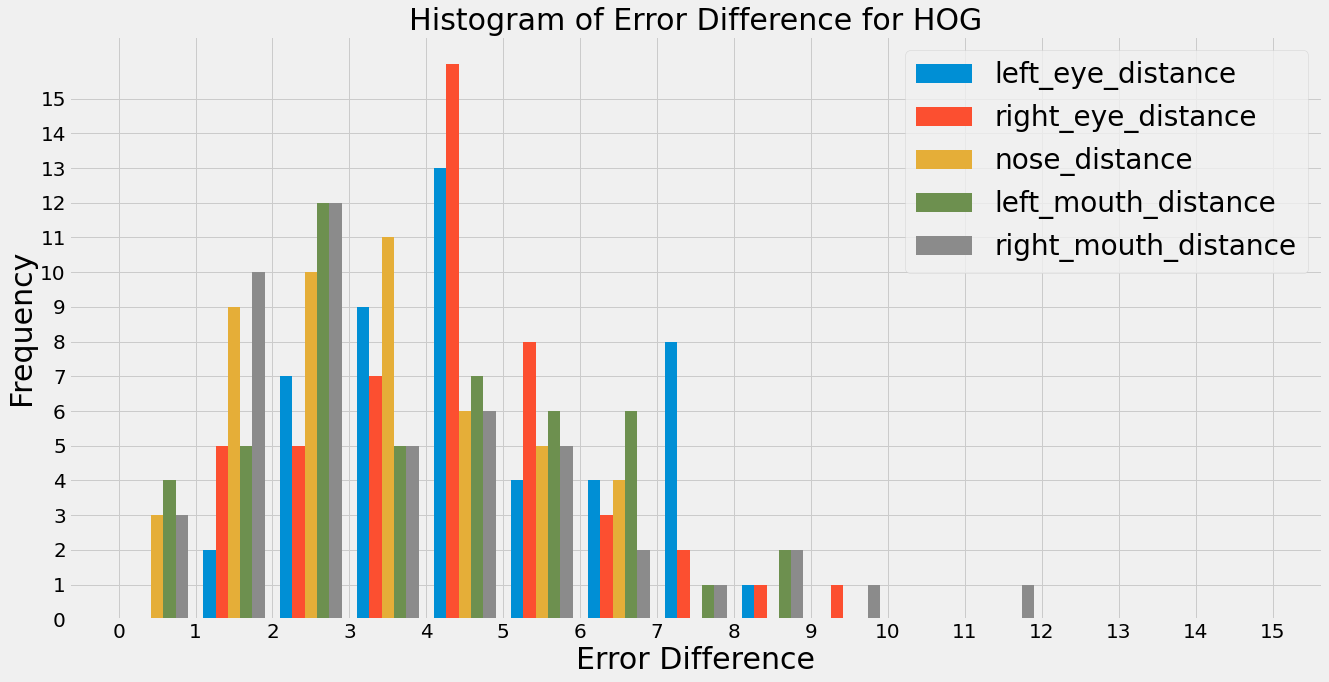

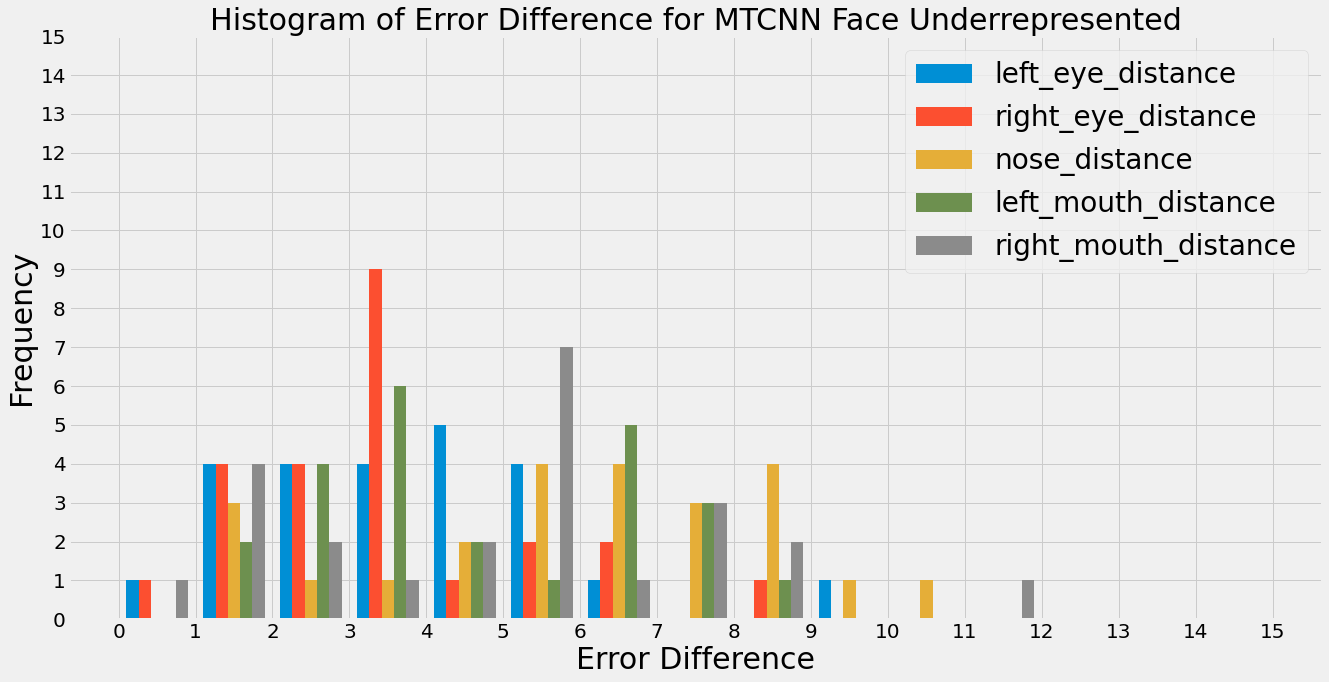

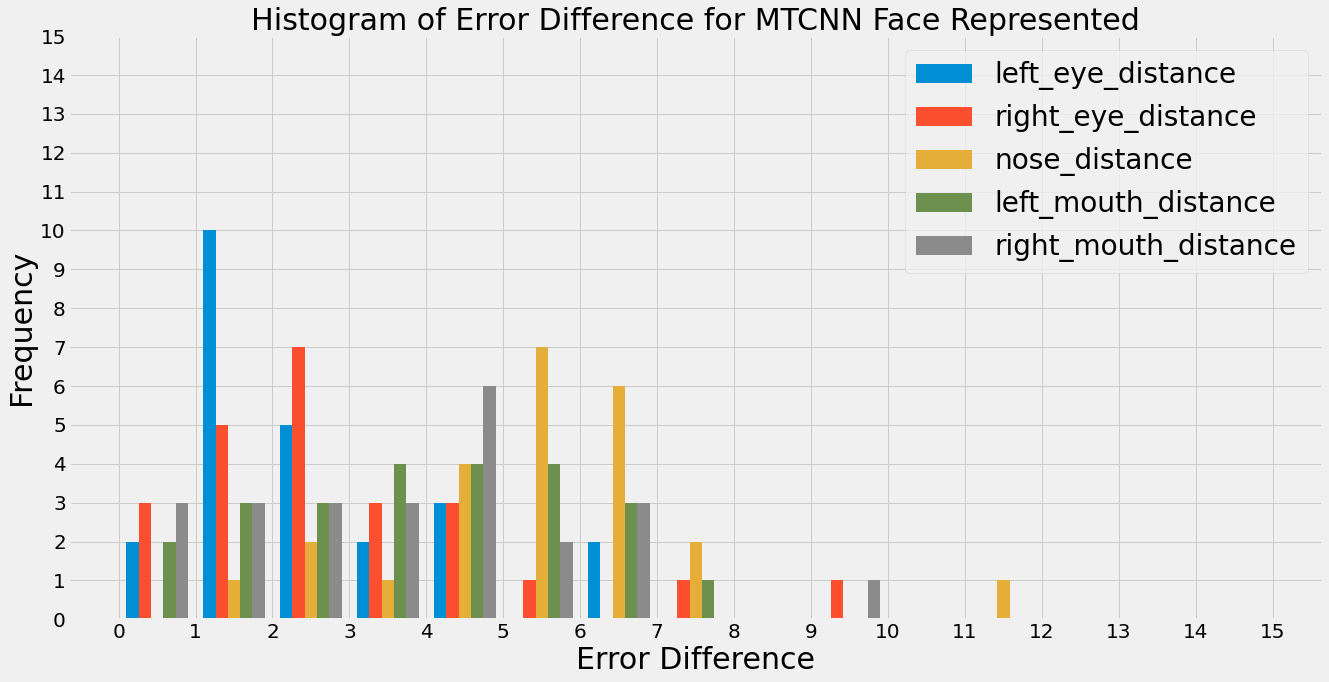

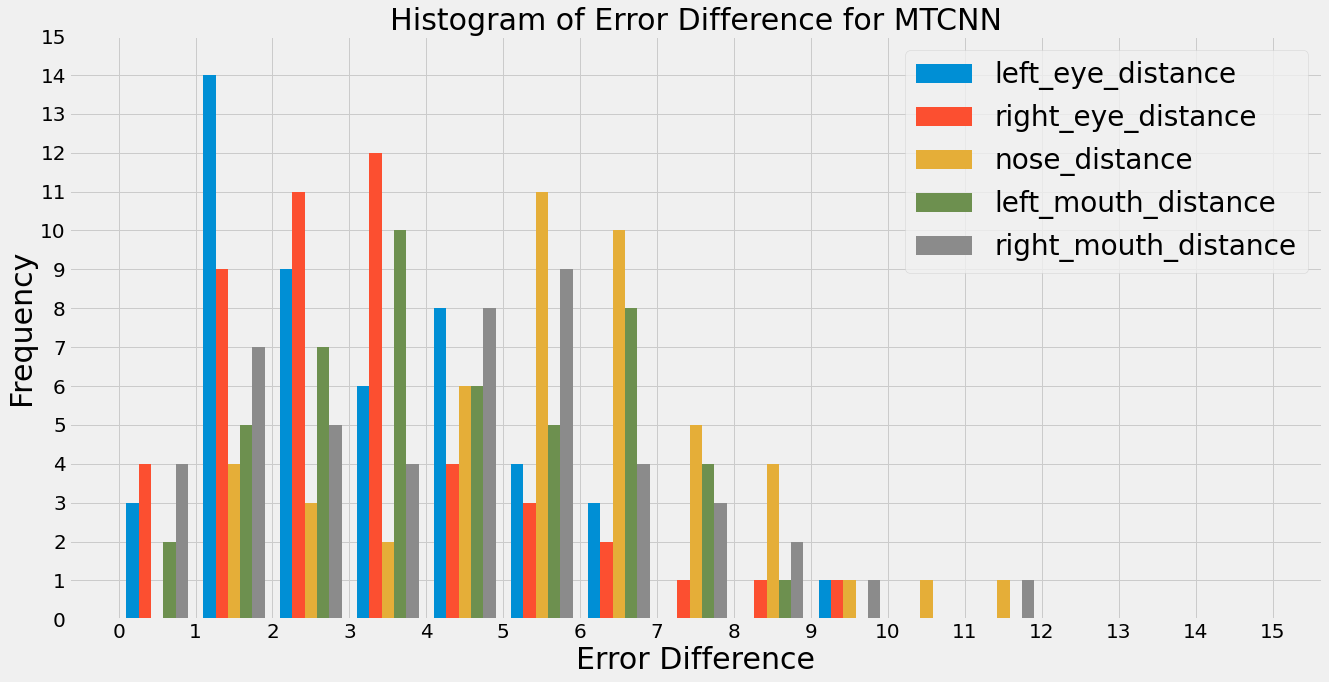

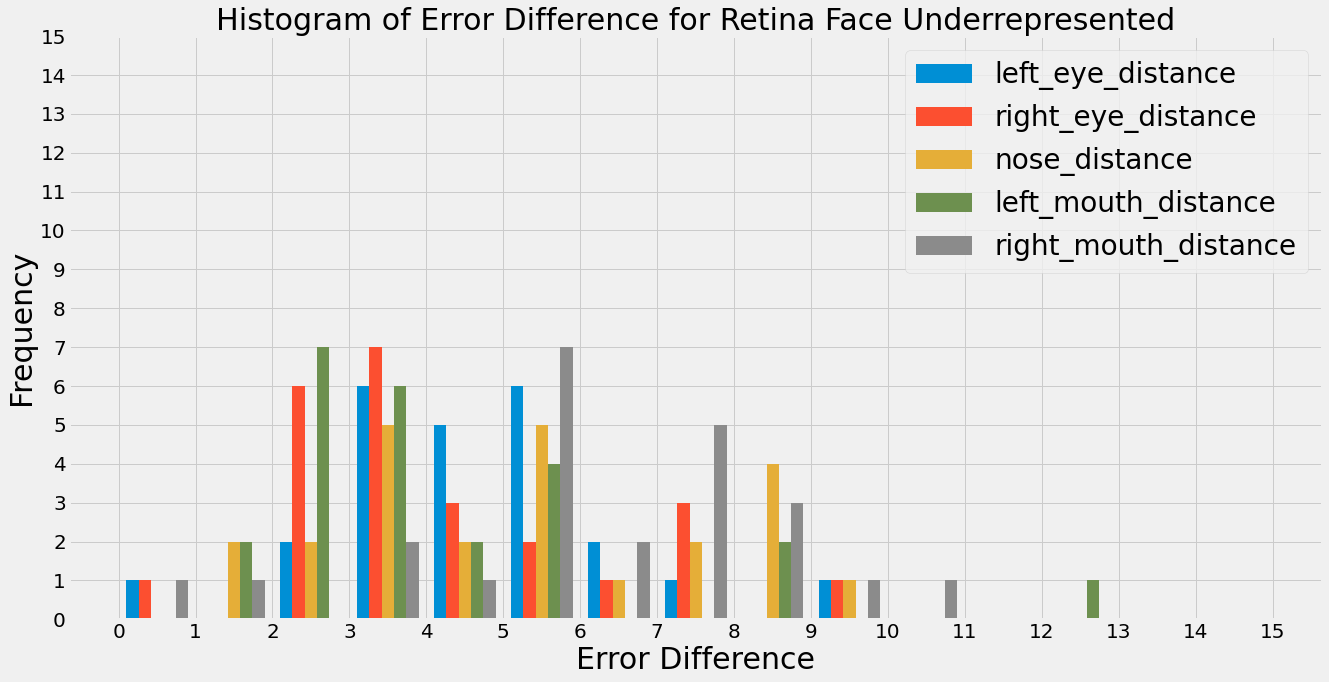

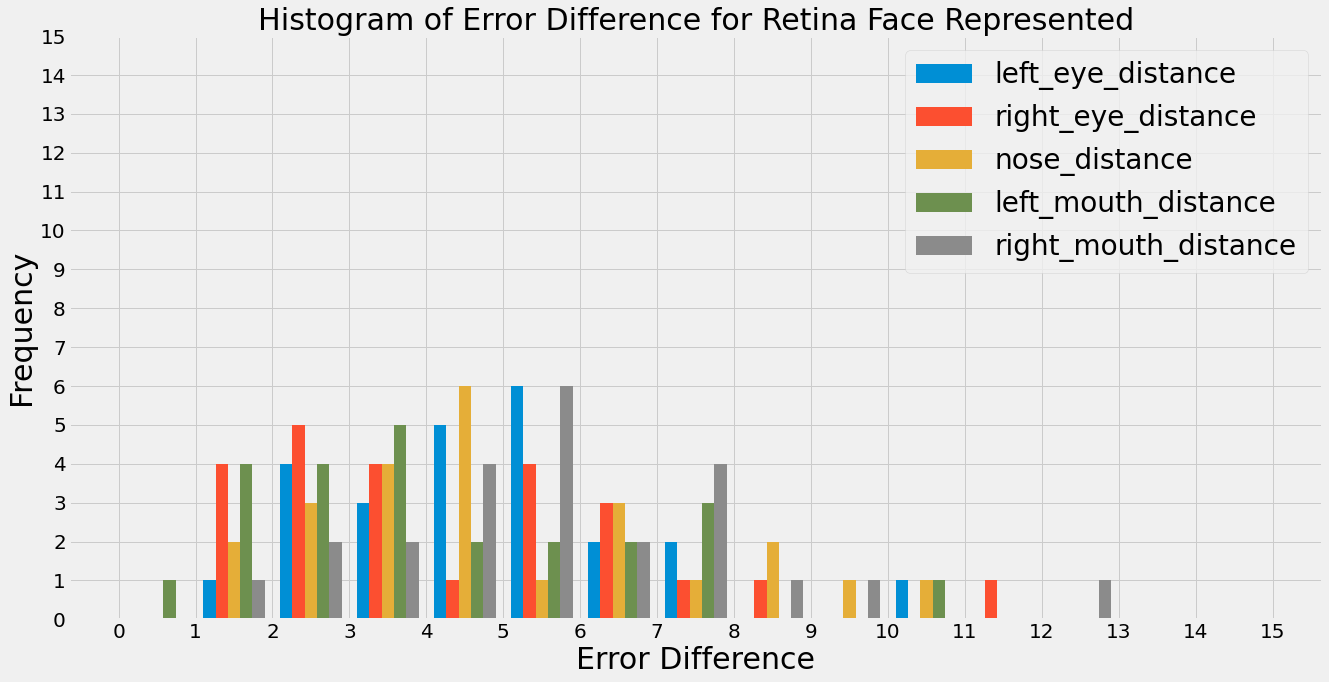

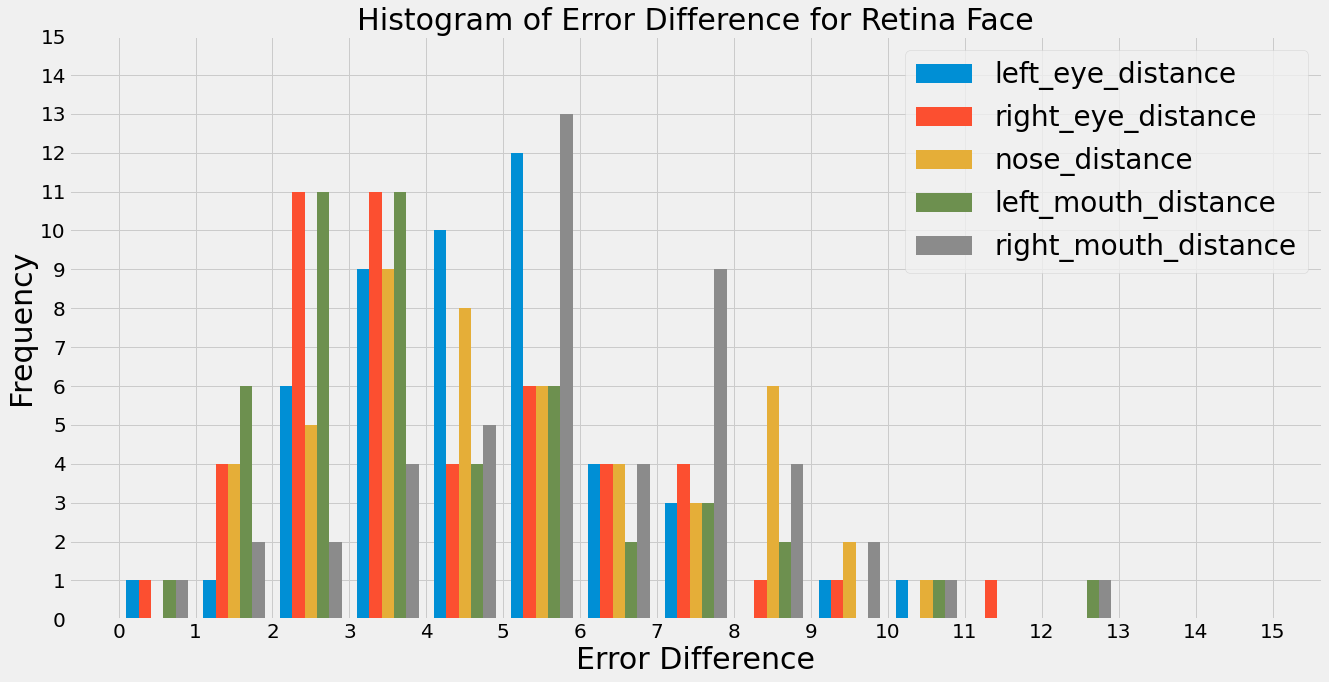

In [28]:
histogram(dlib_error_list_m,"HOG Face Underrepresented")
histogram(dlib_error_list_r,"HOG Face Represented")
histogram(dlib_error_list,"HOG")

histogram(mtcnn_error_list_m,"MTCNN Face Underrepresented")
histogram(mtcnn_error_list_r,"MTCNN Face Represented")
histogram(mtcnn_error_list,"MTCNN")

histogram(retinaface_error_list_m,"Retina Face Underrepresented")
histogram(retinaface_error_list_r,"Retina Face Represented")
histogram(retinaface_error_list,"Retina Face")

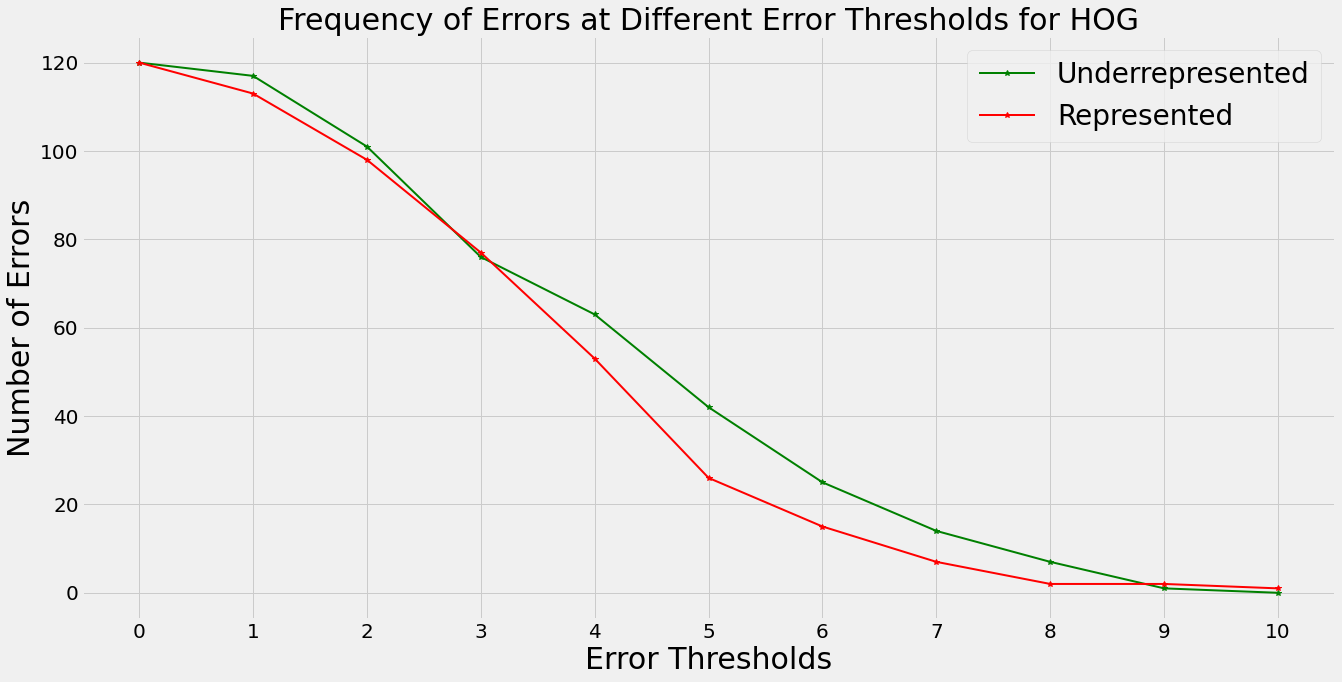

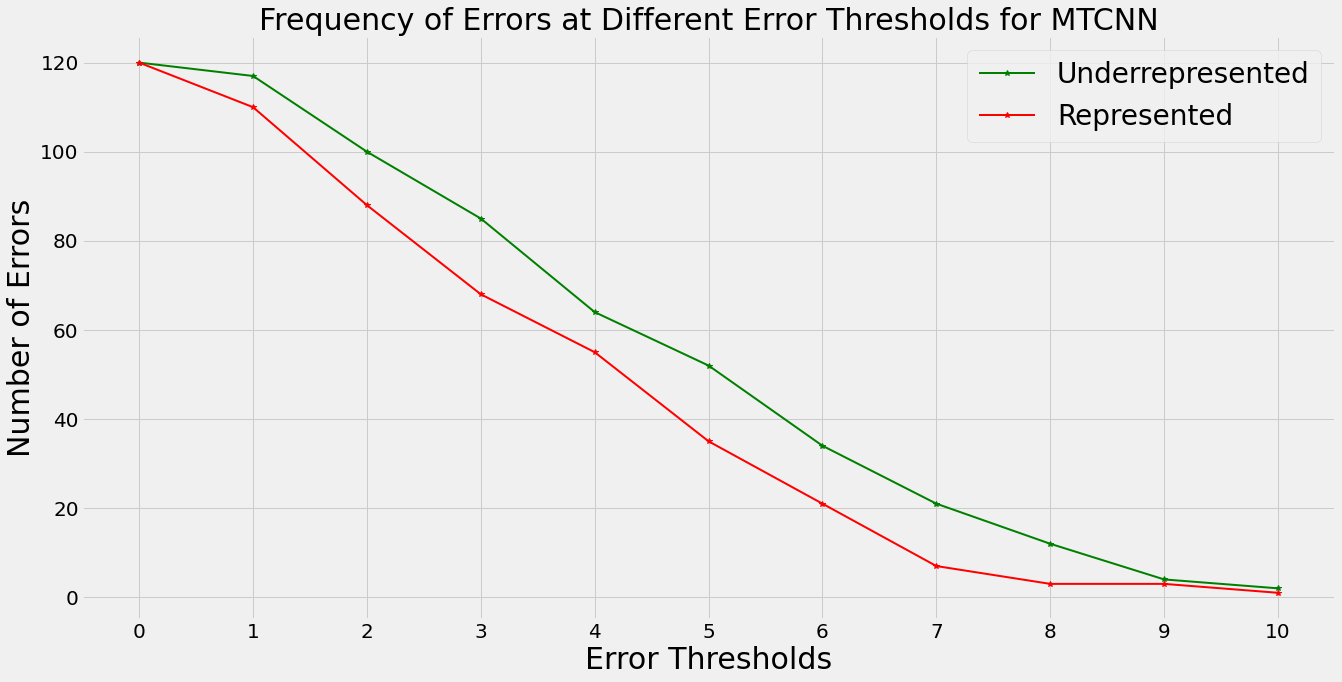

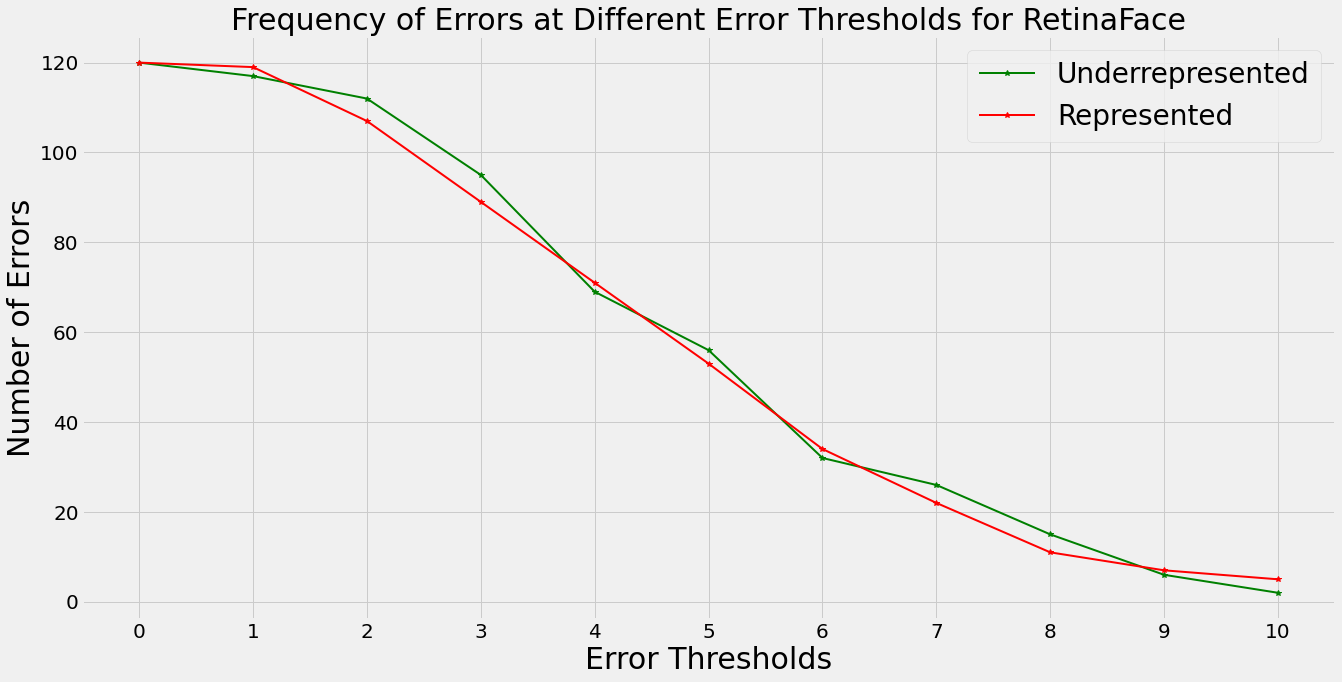

In [29]:
errorThreshold(dlib_diff,"HOG")
errorThreshold(mtcnn_diff,"MTCNN")
errorThreshold(retinaface_diff,"RetinaFace")

Max Error for HOG: 27
Max Error for MTCNN: 6
Max Error for RetinaFace: 4
64 98 154 155
79 68 138 195
83 74 136 186


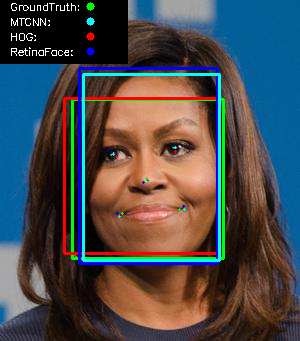

35 118 186 186
34 62 196 261
32 52 195 271


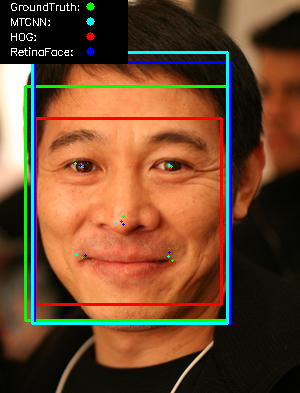

96 67 129 129
100 35 108 165
104 38 105 154


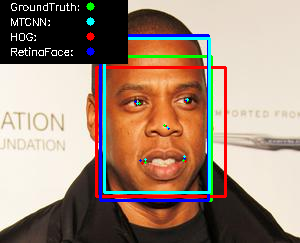

Min Error for HOG: 21
Min Error for MTCNN: 16
Min Error for RetinaFace: 0
145 86 90 90
134 60 99 125
137 63 92 114


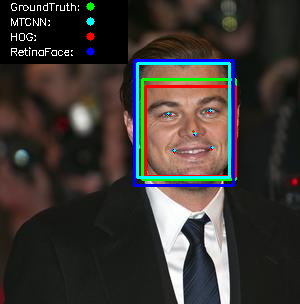

56 118 186 186
65 75 179 243
67 78 174 233


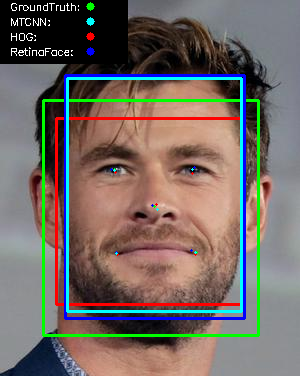

81 81 155 155
75 40 150 216
75 49 152 197


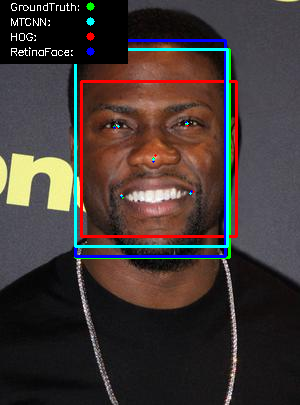

In [30]:
print("Max Error for HOG:", max_error(dlib_diff))
print("Max Error for MTCNN:",max_error(mtcnn_diff))
print("Max Error for RetinaFace:",max_error(retinaface_diff))
show_face_comparison(int(max_error(dlib_diff)))
show_face_comparison(int(max_error(mtcnn_diff)))
show_face_comparison(int(max_error(retinaface_diff)))

print("Min Error for HOG:", min_error(dlib_diff))
print("Min Error for MTCNN:",min_error(mtcnn_diff))
print("Min Error for RetinaFace:",min_error(retinaface_diff))
show_face_comparison(int(min_error(dlib_diff)))
show_face_comparison(int(min_error(mtcnn_diff)))
show_face_comparison(int(min_error(retinaface_diff)))


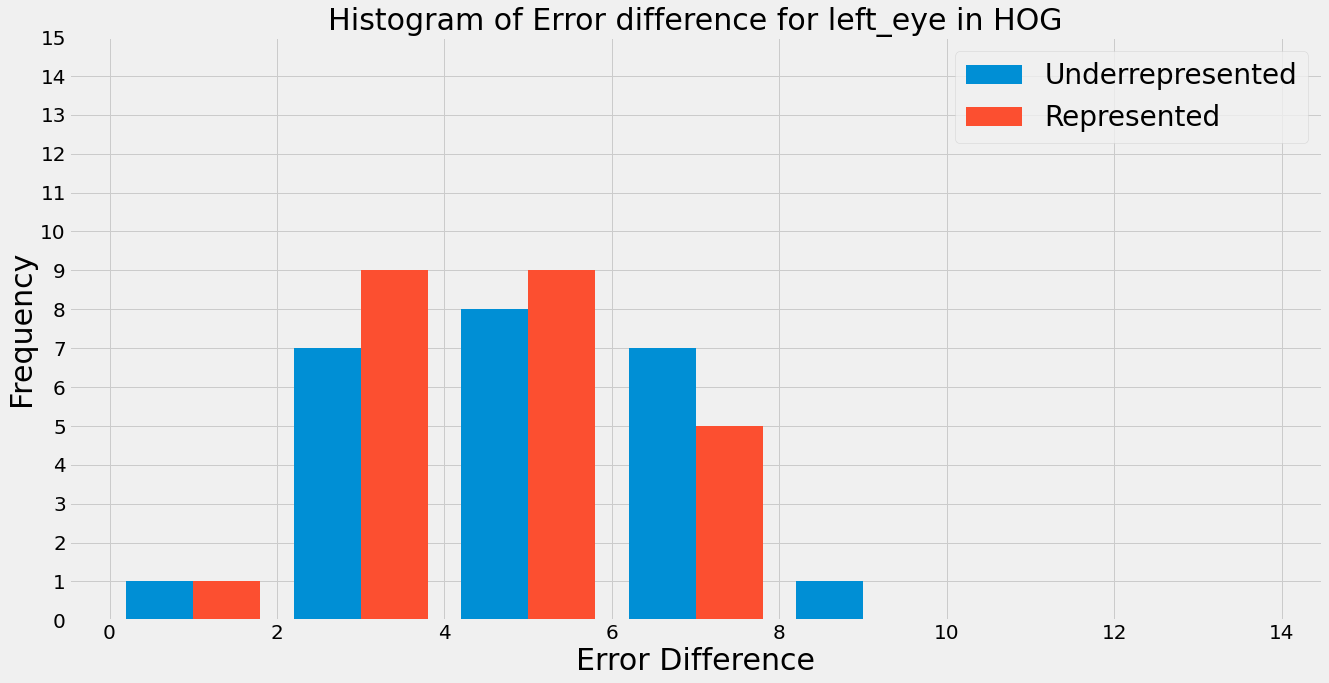

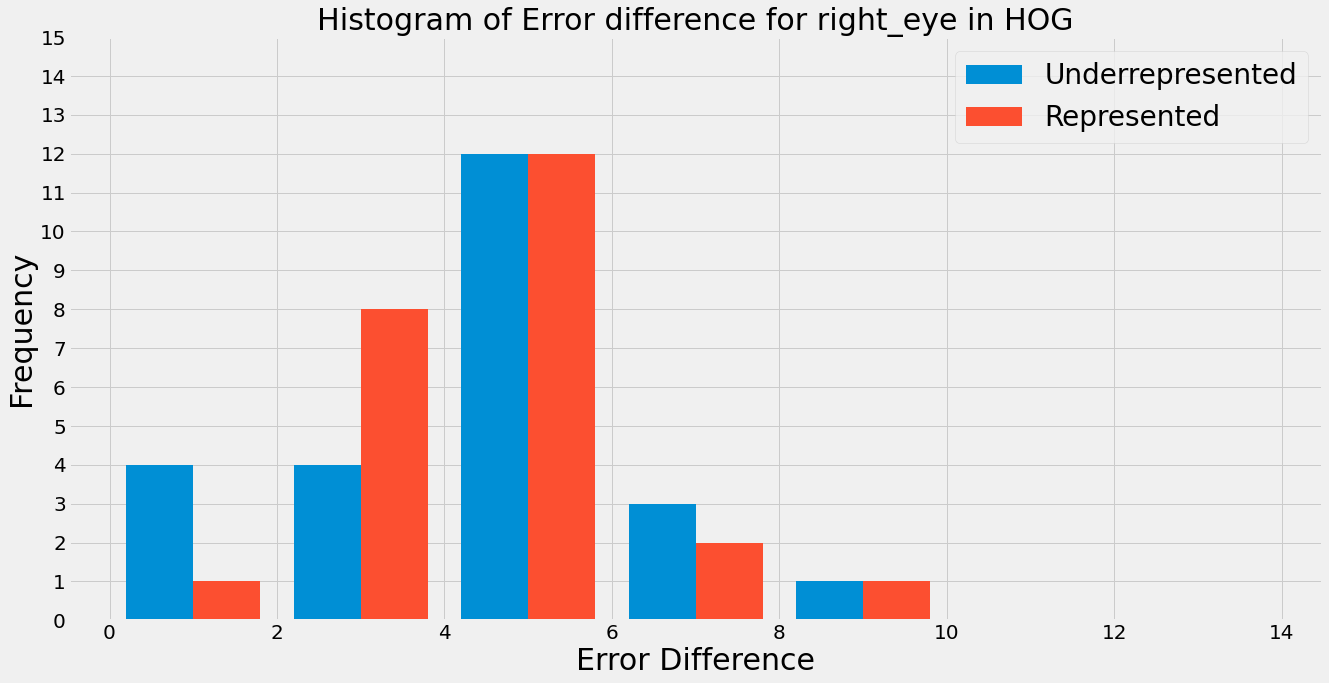

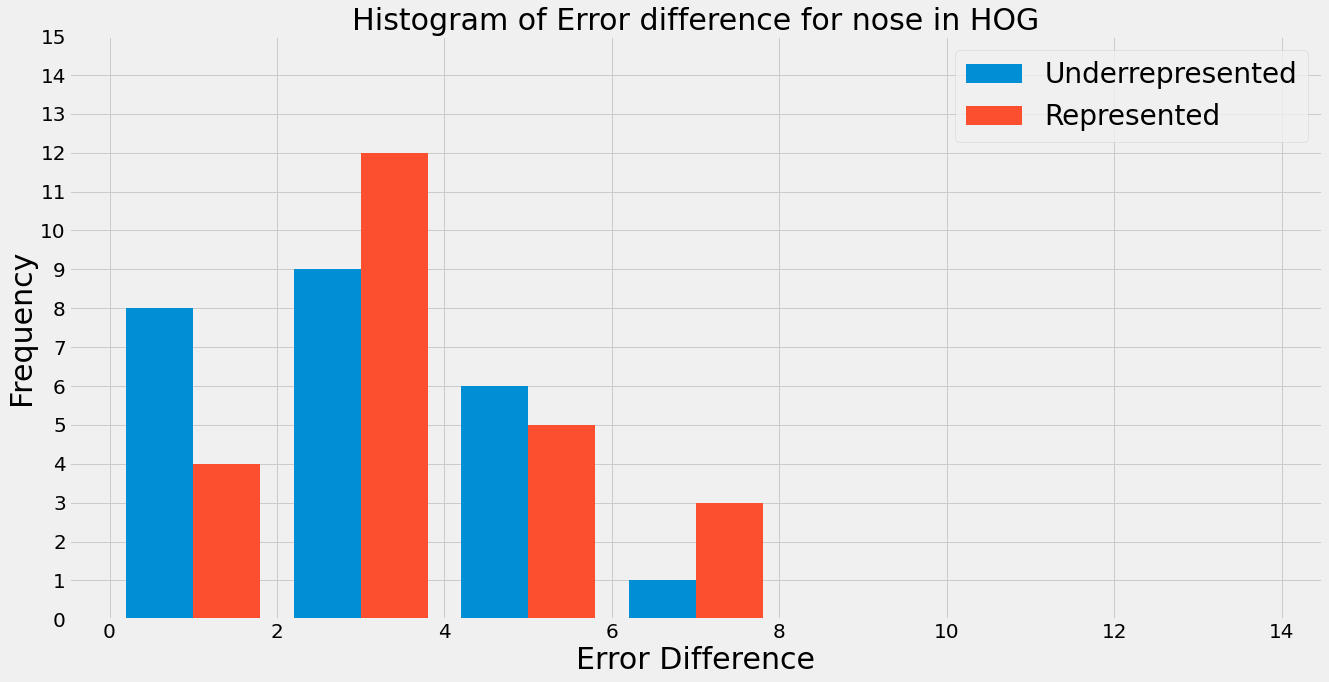

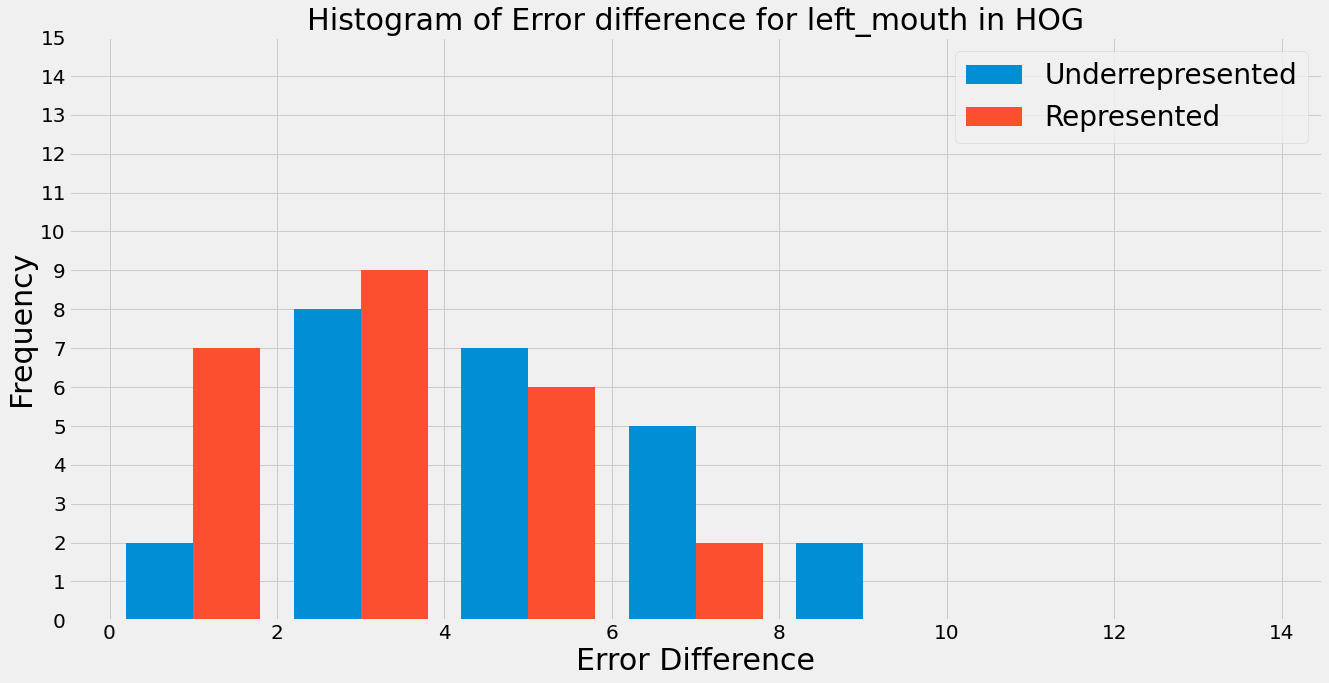

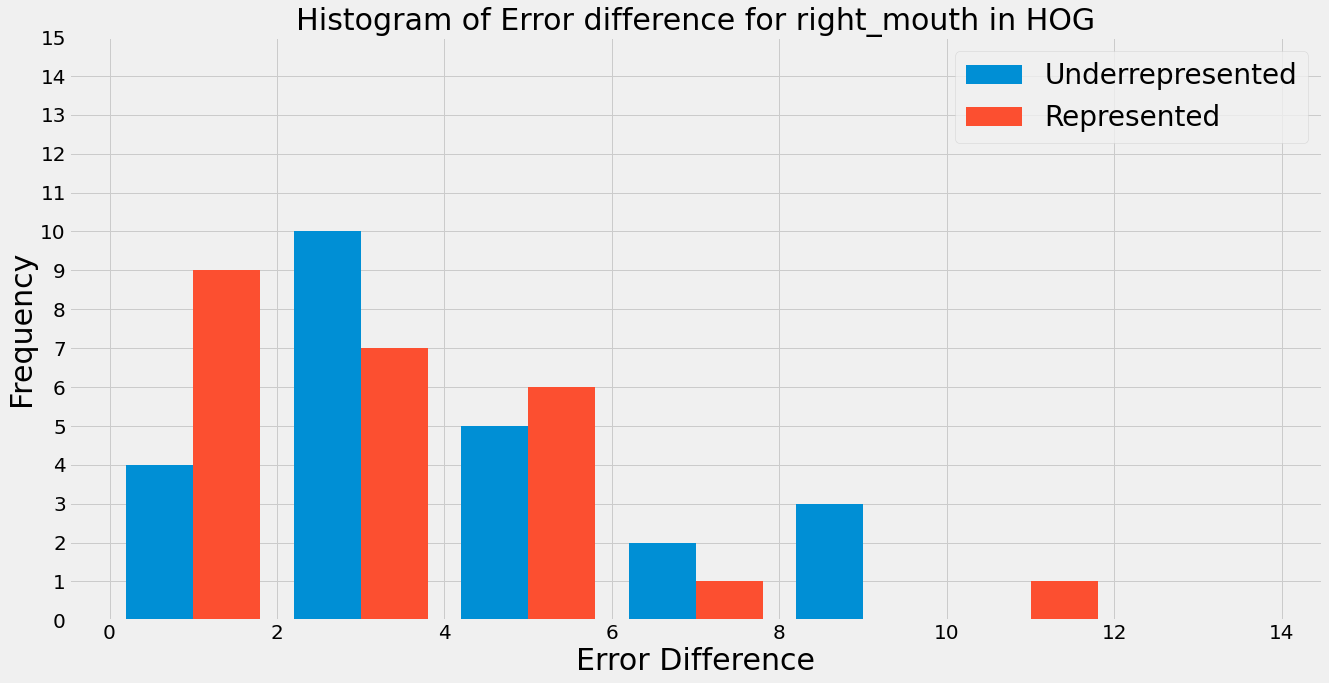

In [31]:

histogramSpecific("left_eye_distance","left_eye in HOG",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("right_eye_distance","right_eye in HOG",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("nose_distance","nose in HOG",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in HOG",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in HOG",dlib_error_list_m,dlib_error_list_r)

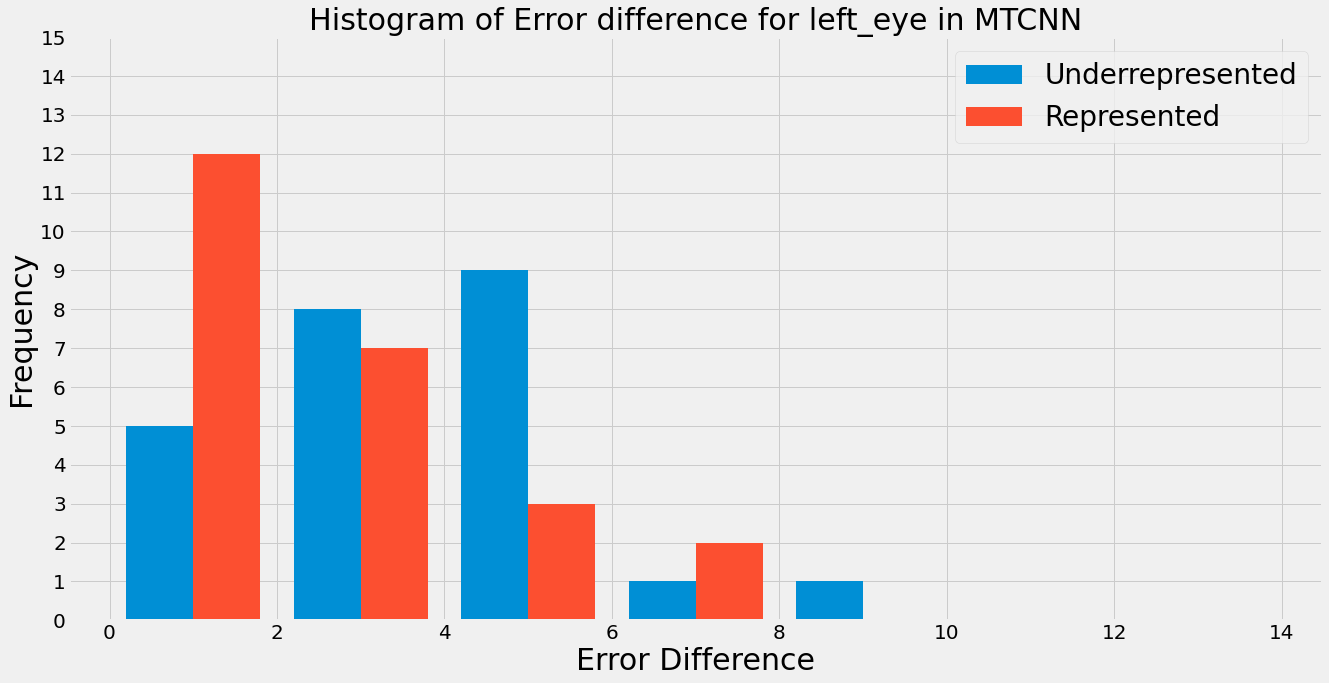

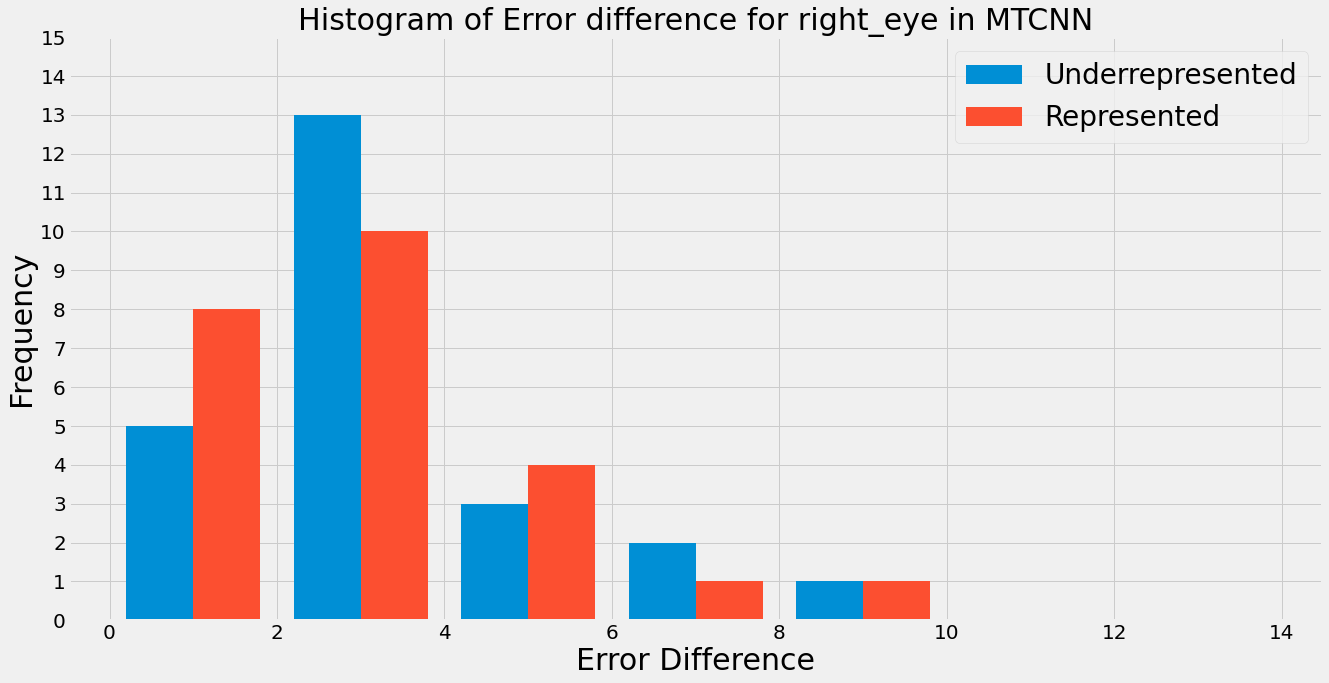

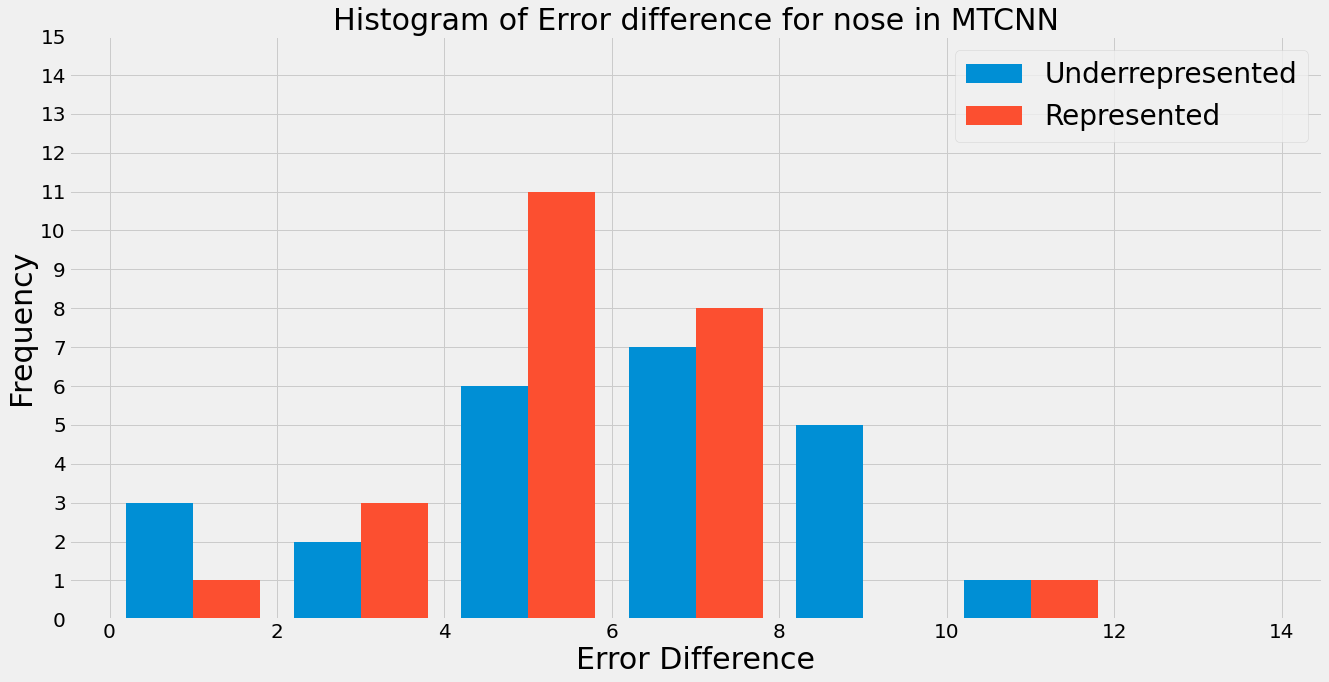

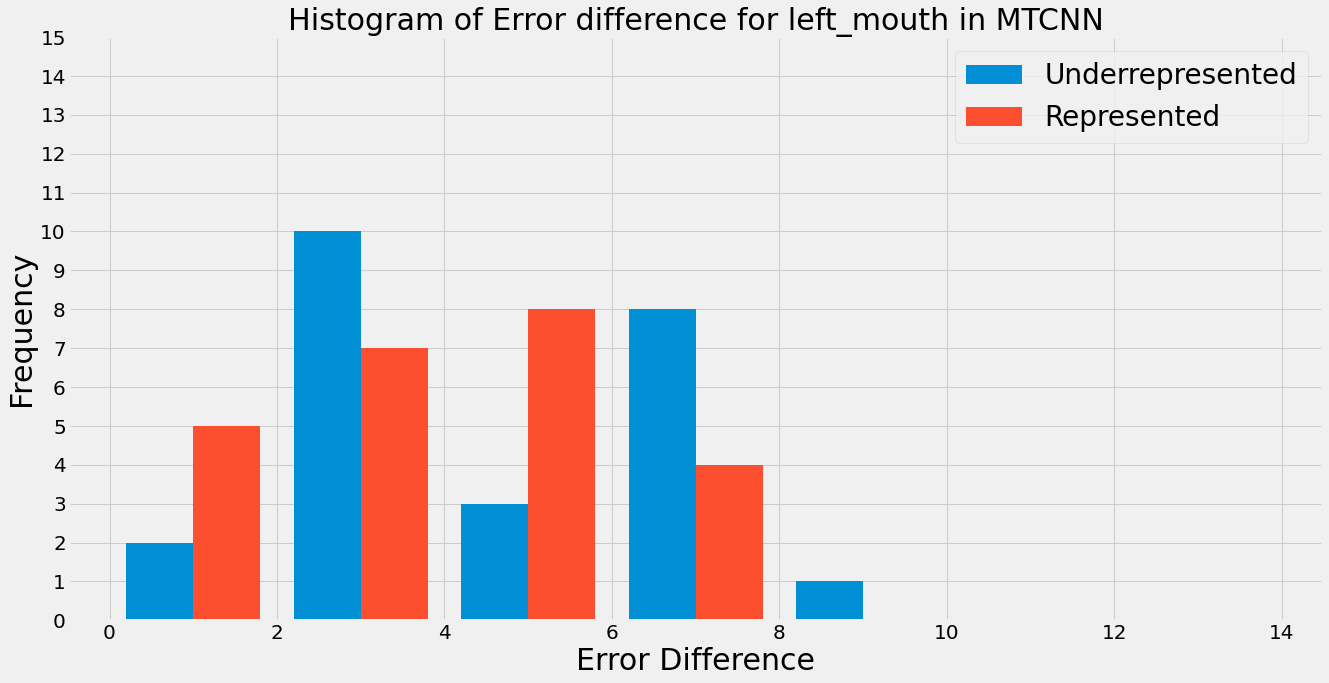

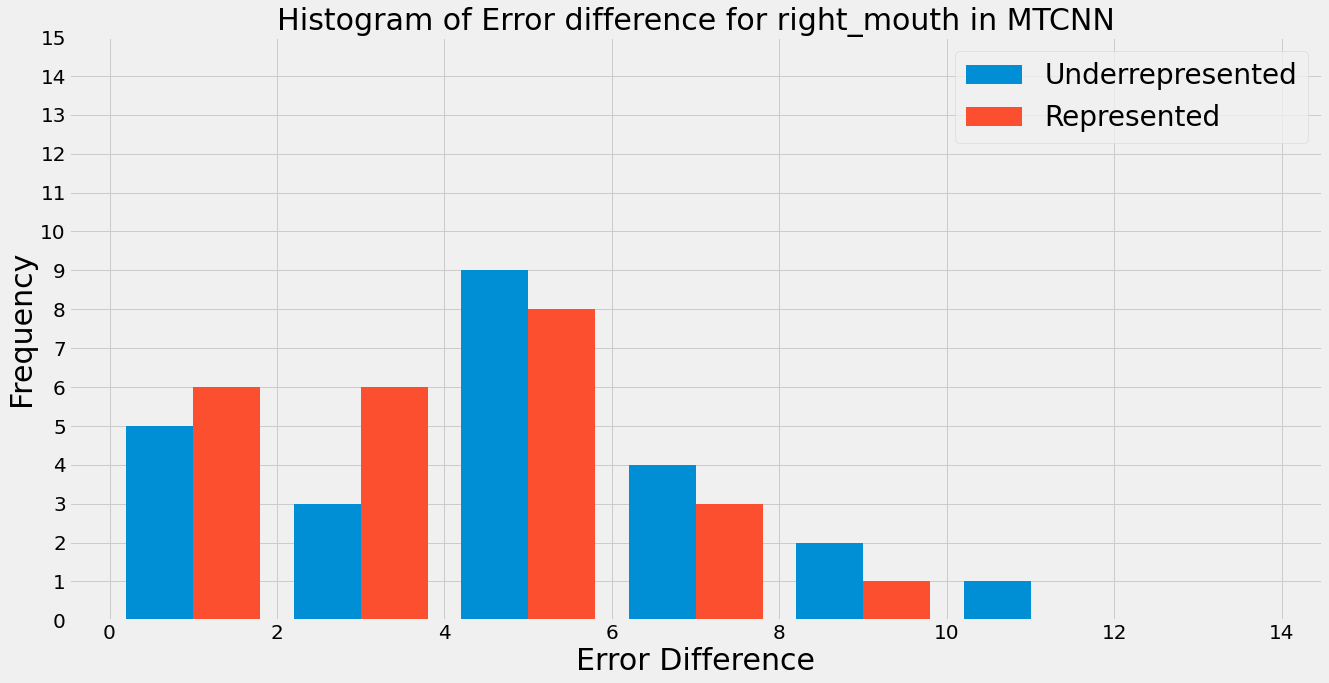

In [32]:
histogramSpecific("left_eye_distance","left_eye in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("right_eye_distance","right_eye in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("nose_distance","nose in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)

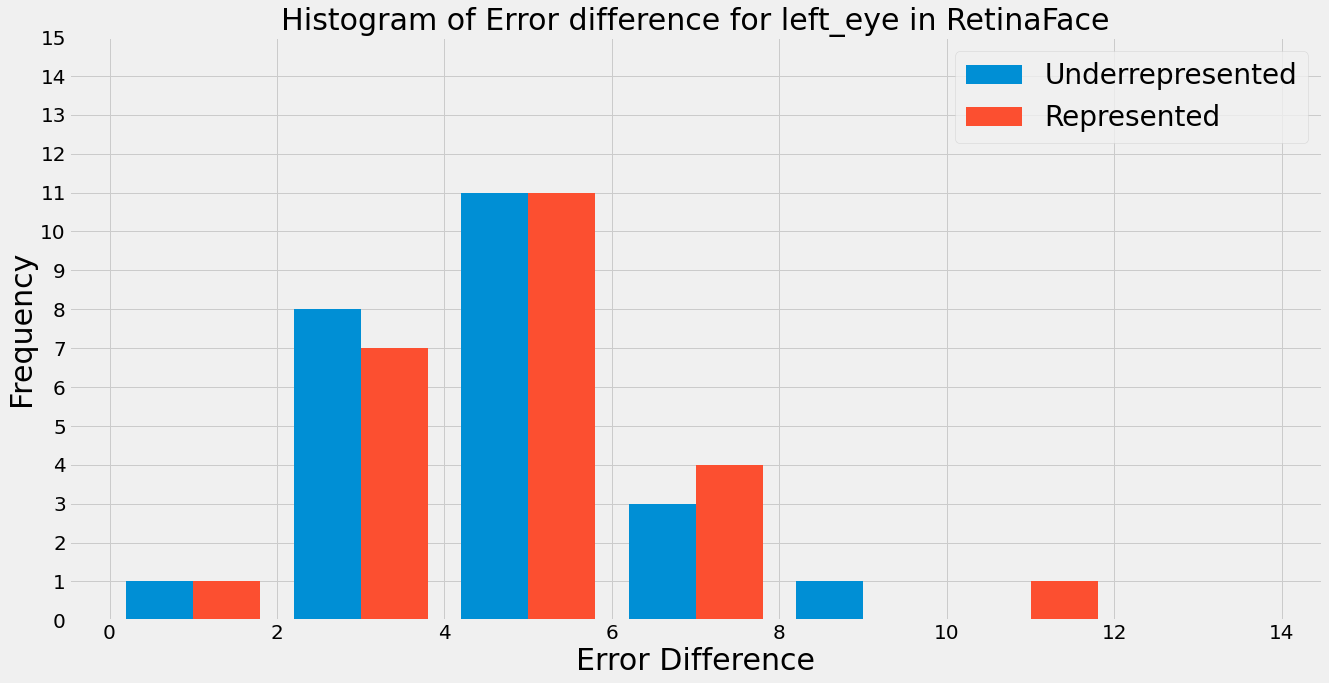

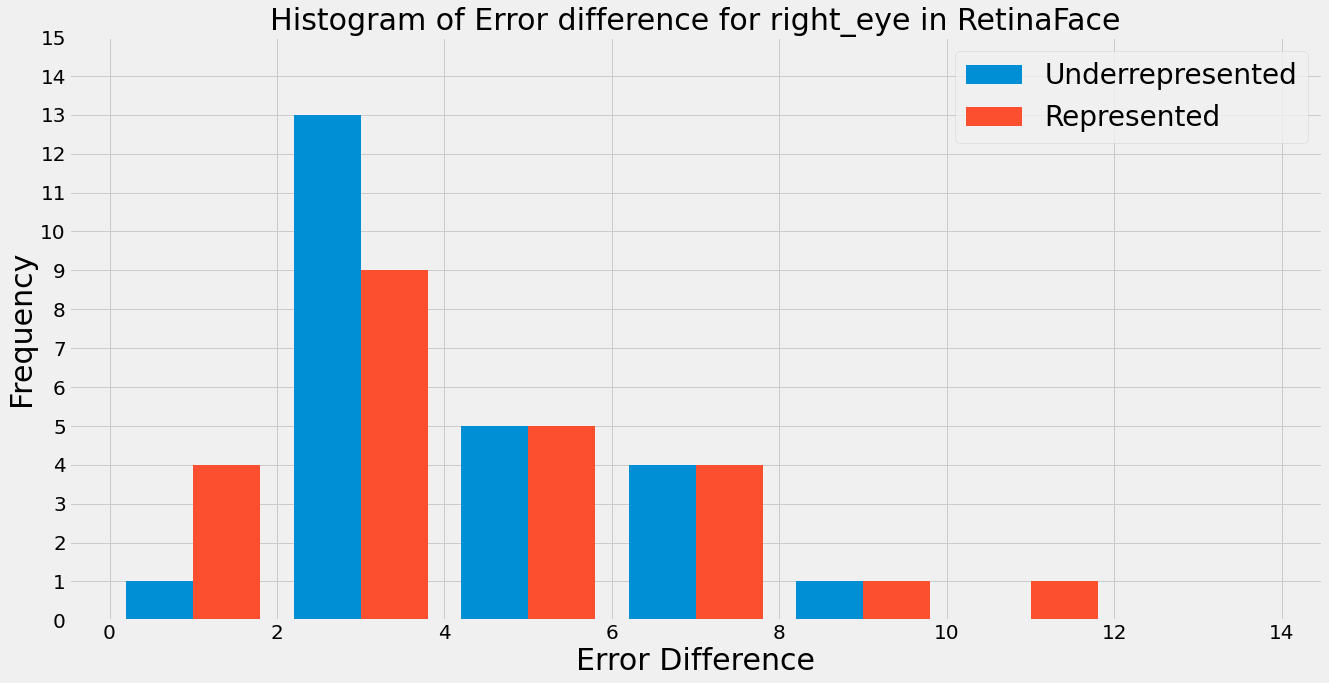

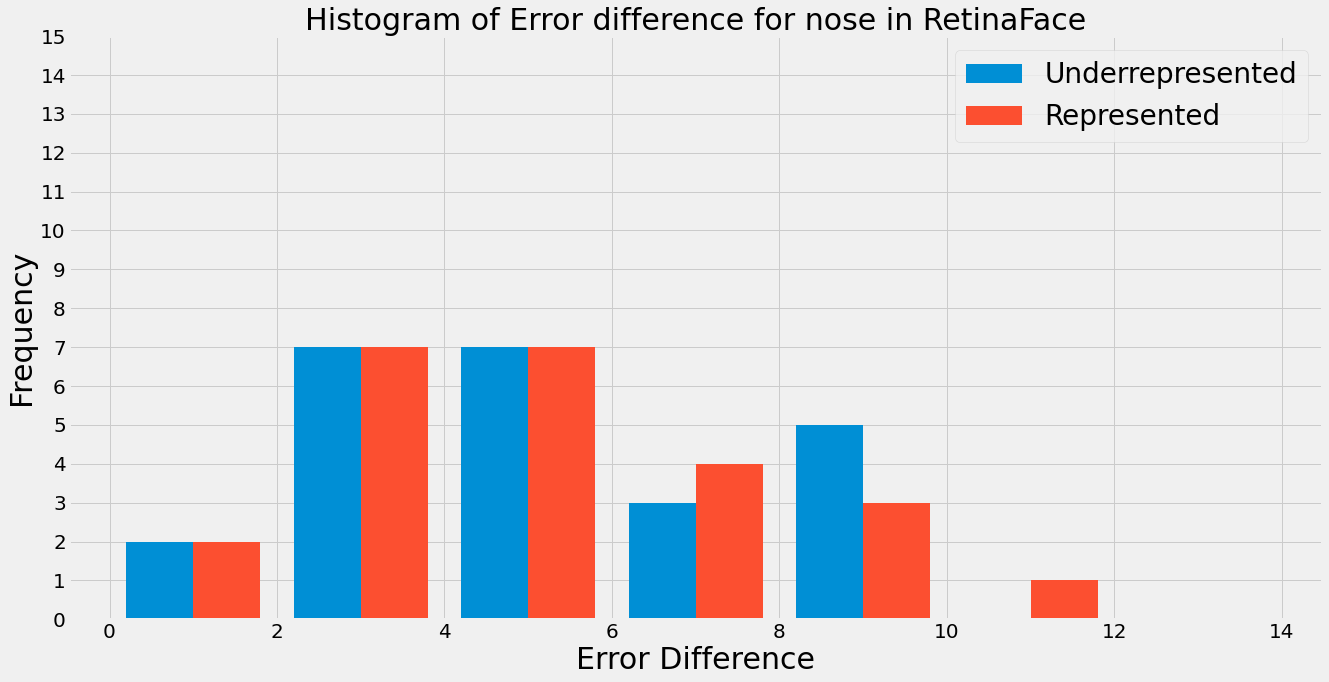

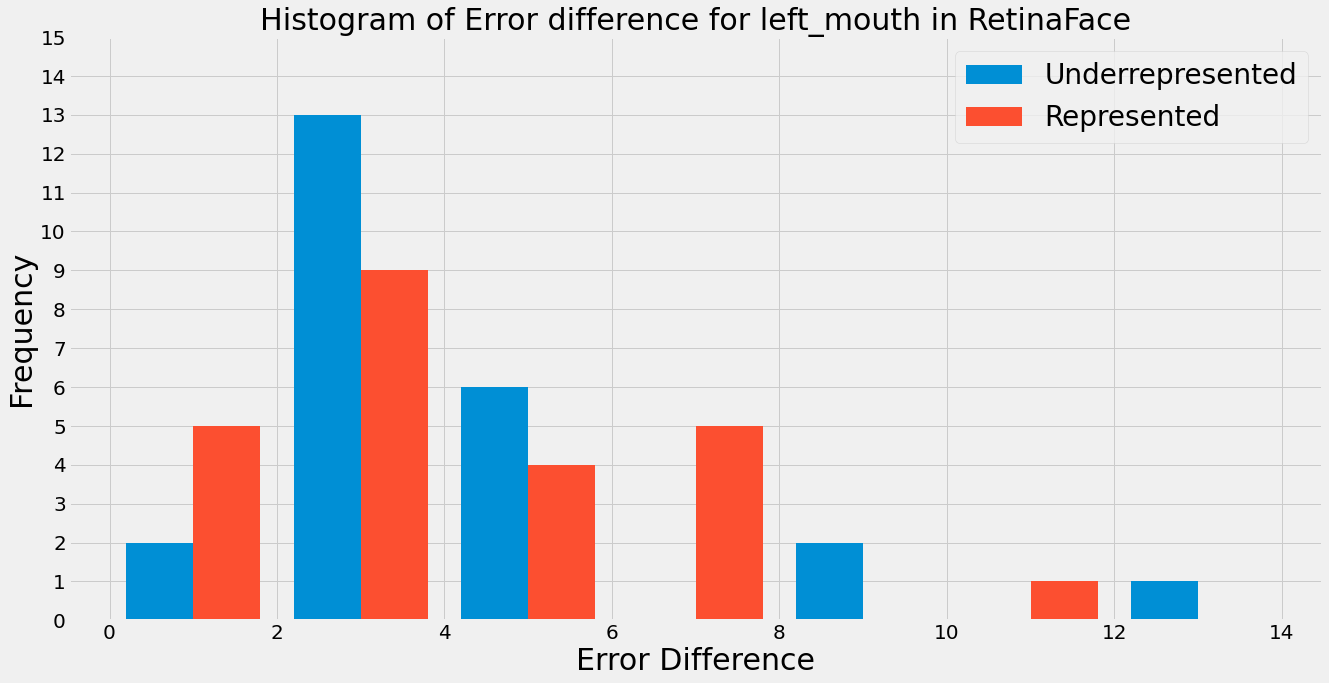

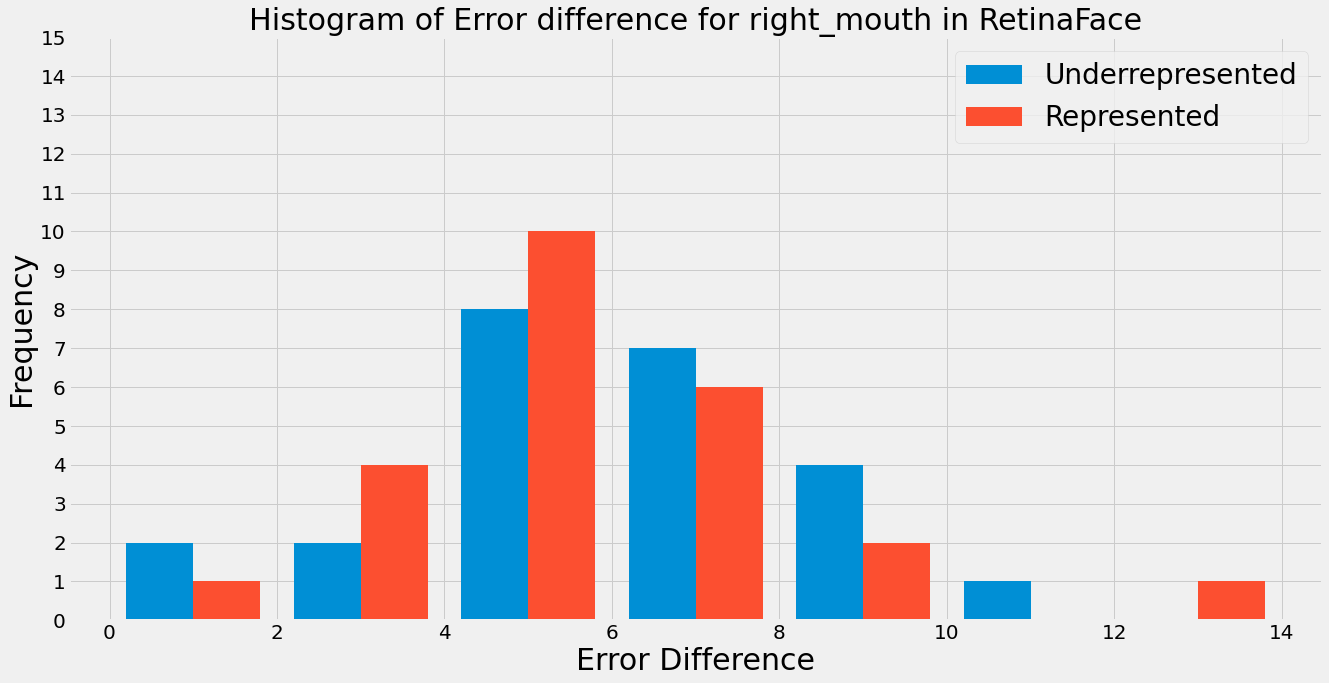

In [33]:
histogramSpecific("left_eye_distance","left_eye in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("right_eye_distance","right_eye in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("nose_distance","nose in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)

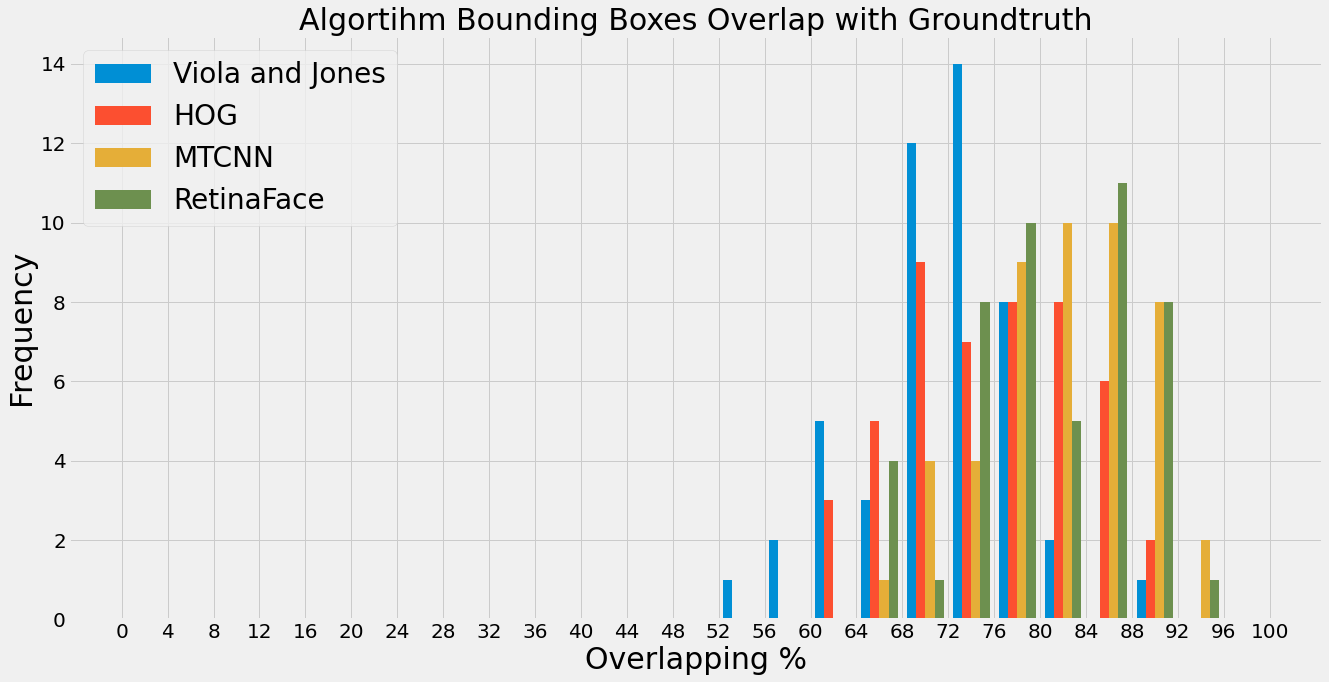

In [34]:
mtcnn_overlap = (overlap(mtcnn_annotated))
dlib_overlap = (overlap(dlib_annotated))
retinaface_overlap = (overlap(retinanet_annotated))
violajones_overlap = (overlap_viola(violajones_annotated))
histogram_bounding(violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap)

In [35]:
dlib_overlap_m,dlib_overlap_r = split_m_r(dlib_overlap)
mtcnn_overlap_m,mtcnn_overlap_r = split_m_r(mtcnn_overlap)
retinaface_overlap_m,retinaface_overlap_r = split_m_r(retinaface_overlap)
violajones_overlap_m,violajones_overlap_r = split_m_r(violajones_overlap)


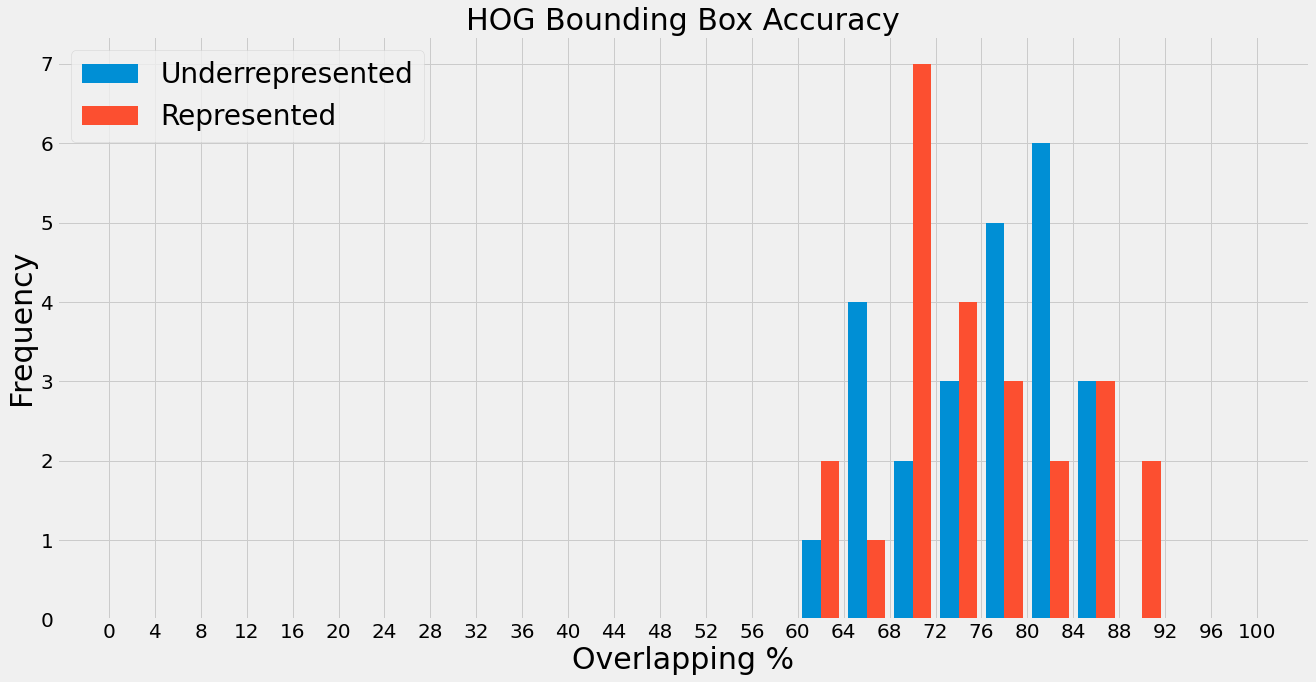

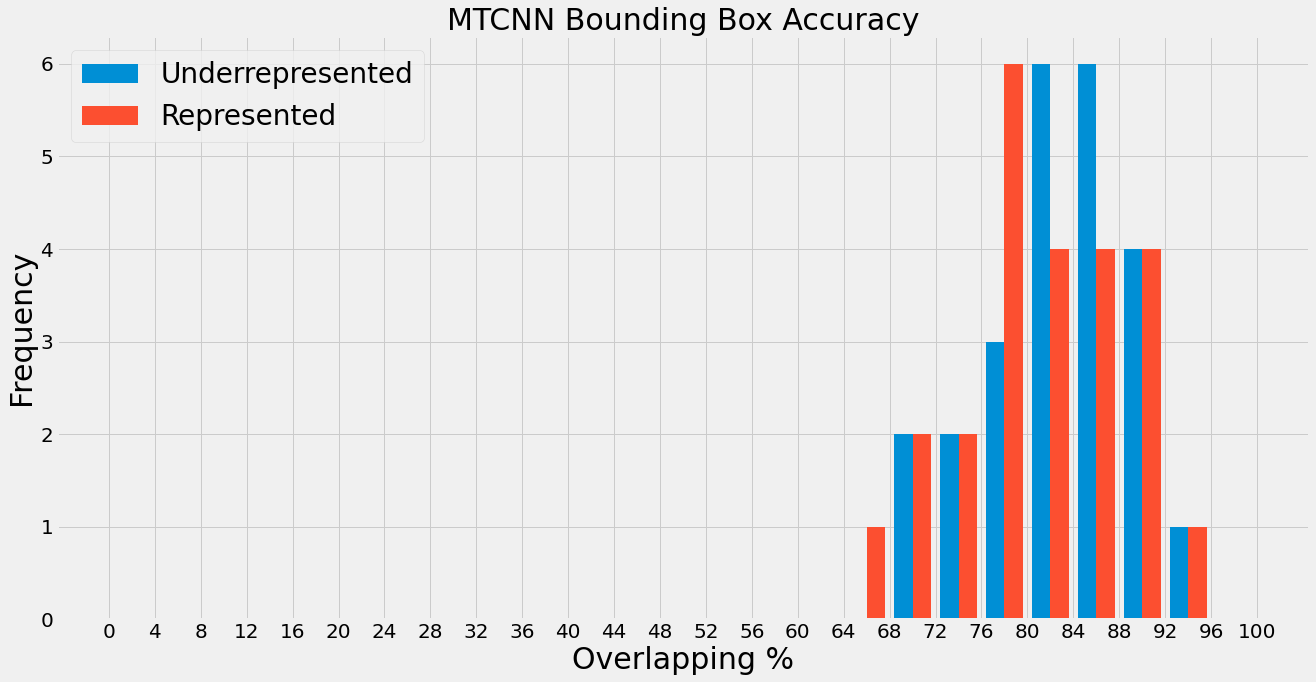

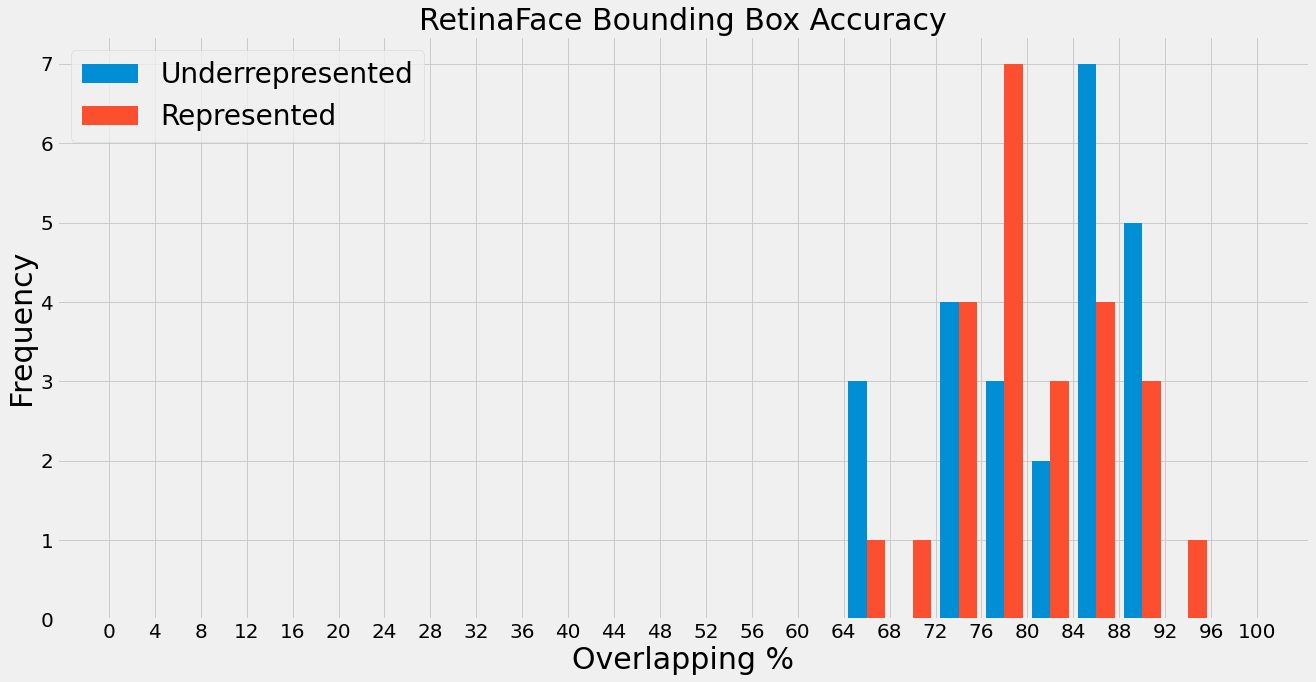

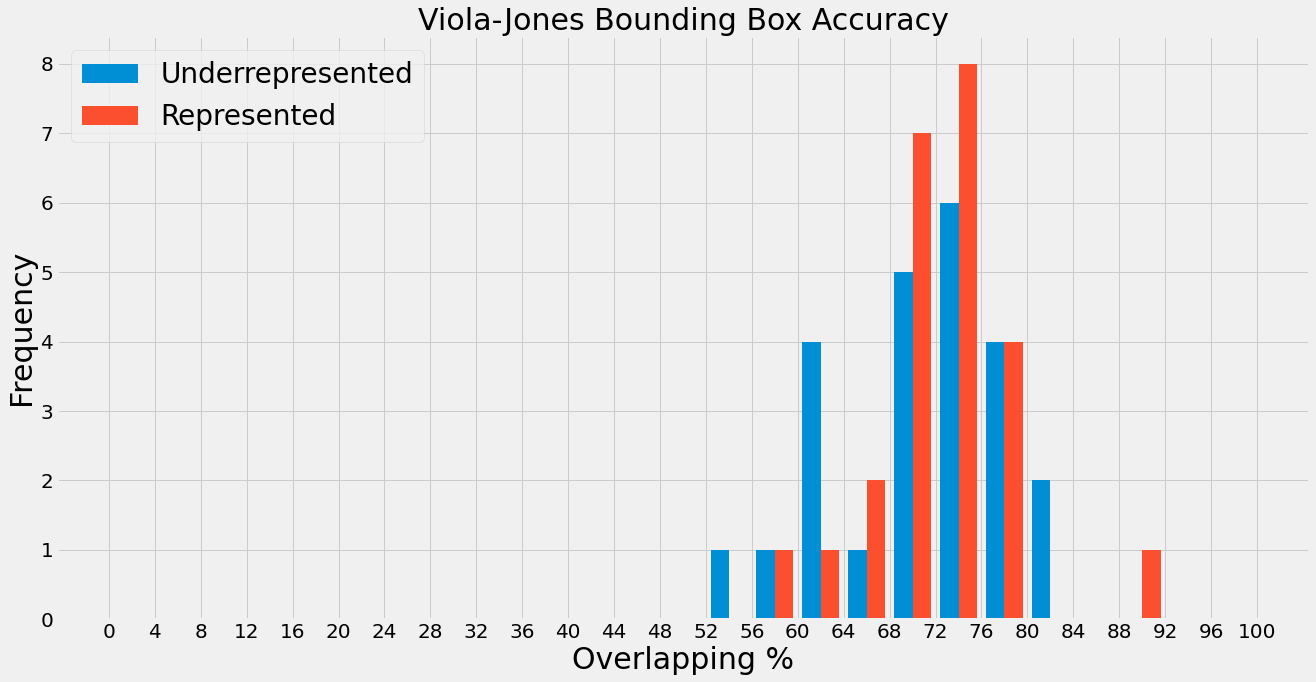

In [36]:
histogram_overlap_mr(dlib_overlap_m,dlib_overlap_r,"HOG")
histogram_overlap_mr(mtcnn_overlap_m,mtcnn_overlap_r,"MTCNN")
histogram_overlap_mr(retinaface_overlap_m,retinaface_overlap_r,"RetinaFace")
histogram_overlap_mr(violajones_overlap_m,violajones_overlap_r,"Viola-Jones")

In [37]:
print("HOG Average:")
m,r = average_diff(dlib_diff)
print("\nMinority:",m, "\nRepresented:",r,"\n")
print("---------------------------------------")
print("MTCNN Average:")
m,r = average_diff(mtcnn_diff)
print("\nMinority:",m, "\nRepresented:",r,"\n")
print("---------------------------------------")
print("RetinaFace Average:")
m,r = average_diff(retinaface_diff)
print("\nMinority:",m, "\nRepresented:",r,"\n")

HOG Average:

Average Underrepresented:
left_eye_distance: 5.048026604617768
right_eye_distance: 4.282012814846922
nose_distance: 3.06844747171418
left_mouth_distance: 4.4793595325068685
right_mouth_distance: 4.19034455354498

Average Represented:
left_eye_distance: 4.411135838649224
right_eye_distance: 4.43434489480205
nose_distance: 3.636072893680762
left_mouth_distance: 3.115031272731226
right_mouth_distance: 3.1864969706251505

Minority: 4.213638195446143 
Represented: 3.7566163740976823 

---------------------------------------
MTCNN Average:

Average Underrepresented:
left_eye_distance: 3.7782713890584834
right_eye_distance: 3.6059823721991253
nose_distance: 5.935388986275754
left_mouth_distance: 4.698201870354663
right_mouth_distance: 5.053038201174091

Average Represented:
left_eye_distance: 2.5735907358318237
right_eye_distance: 3.0451517519806823
nose_distance: 5.47185323911422
left_mouth_distance: 3.889454456735137
right_mouth_distance: 3.715524920473188

Minority: 4.6141765

In [38]:
set_0 = np.random.randint(low = 0, high = 48, size = 36) 
set_1 = np.random.randint(low = 0, high = 48, size = 36) 
set_2 = np.random.randint(low = 0, high = 48, size = 36) 
set_3 = np.random.randint(low = 0, high = 48, size = 36) 
set_4 = np.arange(48)

In [39]:
print("HOG")
dlib_sd = standarddeviation(dlib_diff,set_0,set_1,set_2,set_3)
print("---------------------------------------")
print("MTCNN")
mtcnn_sd = standarddeviation(mtcnn_diff,set_0,set_1,set_2,set_3)
print("---------------------------------------")
print("RetinaFace")
retinaface_sd = standarddeviation(retinaface_diff,set_0,set_1,set_2,set_3)

HOG
left_eye_distance: 4.897535856550512 +/- 0.19473741915742454 	right_eye_distance: 4.4126946289951 +/- 0.17504523914069844
nose_distance: 3.4762093145973667 +/- 0.41387138473774815
left_mouth_distance: 3.858340642303137 +/- 0.4451498238940205 	right_mouth_distance: 3.735085166892941 +/- 0.19308266029402074

---------------------------------------
MTCNN
left_eye_distance: 3.3930368657807923 +/- 0.3099299793881804 	right_eye_distance: 3.16778481012814 +/- 0.22258213725277823
nose_distance: 5.757736533056605 +/- 0.2714735945662725
left_mouth_distance: 4.349165002920334 +/- 0.08094000644057711 	right_mouth_distance: 4.583842779833303 +/- 0.30231156261394193

---------------------------------------
RetinaFace
left_eye_distance: 4.693359487412103 +/- 0.1698682919209354 	right_eye_distance: 4.320189780760022 +/- 0.15492422023062577
nose_distance: 5.400975841366104 +/- 0.4229207746071148
left_mouth_distance: 4.314928262594519 +/- 0.18694193845206736 	right_mouth_distance: 5.873131041744072 

In [40]:
dlib_m,dlib_r = split_diff_m_r(dlib_diff)
mtcnn_m,mtcnn_r = split_diff_m_r(mtcnn_diff)
retinaface_m,retinaface_r = split_diff_m_r(retinaface_diff)


In [41]:

print("HOG")
dlib_sd = standarddeviation(dlib_diff,set_4,set_4,set_4,set_4)
print("---------------------------------------")
print("MTCNN")
mtcnn_sd = standarddeviation(mtcnn_diff,set_4,set_4,set_4,set_4)
print("---------------------------------------")
print("RetinaFace")
retinaface_sd = standarddeviation(retinaface_diff,set_4,set_4,set_4,set_4)

HOG
left_eye_distance: 4.729581221633494 +/- 0.0 	right_eye_distance: 4.3581788548244855 +/- 0.0
nose_distance: 3.352260182697471 +/- 0.0
left_mouth_distance: 3.7971954026190473 +/- 0.0 	right_mouth_distance: 3.6884207620850655 +/- 0.0

---------------------------------------
MTCNN
left_eye_distance: 3.1759310624451533 +/- 0.0 	right_eye_distance: 3.325567062089904 +/- 0.0
nose_distance: 5.703621112694986 +/- 0.0
left_mouth_distance: 4.293828163544898 +/- 0.0 	right_mouth_distance: 4.384281560823639 +/- 0.0

---------------------------------------
RetinaFace
left_eye_distance: 4.6762421305883155 +/- 0.0 	right_eye_distance: 4.30629810880139 +/- 0.0
nose_distance: 5.1894183853648235 +/- 0.0
left_mouth_distance: 4.17924026762578 +/- 0.0 	right_mouth_distance: 5.926639065658249 +/- 0.0



In [42]:
print("HOG")
print("===========================")
extreme(dlib_diff,"left_eye_distance",8)
extreme(dlib_diff,"right_eye_distance",8)
extreme(dlib_diff,"nose_distance",8)
extreme(dlib_diff,"left_mouth_distance",8)
extreme(dlib_diff,"right_mouth_distance",8)


HOG
left_eye_distance 27
----------------------------
right_eye_distance 23
right_eye_distance 26
----------------------------
----------------------------
left_mouth_distance 1
left_mouth_distance 8
----------------------------
right_mouth_distance 13
right_mouth_distance 29
right_mouth_distance 33
right_mouth_distance 34
----------------------------


In [43]:
print("MTCNN")
print("===========================")
extreme(mtcnn_diff,"left_eye_distance",7)
extreme(mtcnn_diff,"right_eye_distance",7)
extreme(mtcnn_diff,"nose_distance",7)
extreme(mtcnn_diff,"left_mouth_distance",7)
extreme(mtcnn_diff,"right_mouth_distance",7)


MTCNN
left_eye_distance 6
----------------------------
right_eye_distance 9
right_eye_distance 17
right_eye_distance 37
----------------------------
nose_distance 1
nose_distance 2
nose_distance 4
nose_distance 5
nose_distance 6
nose_distance 10
nose_distance 11
nose_distance 12
nose_distance 17
nose_distance 18
nose_distance 24
nose_distance 34
----------------------------
left_mouth_distance 1
left_mouth_distance 6
left_mouth_distance 20
left_mouth_distance 30
left_mouth_distance 34
----------------------------
right_mouth_distance 1
right_mouth_distance 4
right_mouth_distance 13
right_mouth_distance 27
right_mouth_distance 29
right_mouth_distance 32
right_mouth_distance 33
----------------------------


In [44]:
 print("RetinaFace")
print("===========================")
extreme(retinaface_diff,"left_eye_distance",8)
extreme(retinaface_diff,"right_eye_distance",8)
extreme(retinaface_diff,"nose_distance",8)
extreme(retinaface_diff,"left_mouth_distance",8)
extreme(retinaface_diff,"right_mouth_distance",8)

RetinaFace
left_eye_distance 4
left_eye_distance 18
----------------------------
right_eye_distance 17
right_eye_distance 26
right_eye_distance 37
----------------------------
nose_distance 4
nose_distance 6
nose_distance 8
nose_distance 14
nose_distance 18
nose_distance 27
nose_distance 33
nose_distance 41
nose_distance 44
----------------------------
left_mouth_distance 4
left_mouth_distance 27
left_mouth_distance 33
left_mouth_distance 36
----------------------------
right_mouth_distance 6
right_mouth_distance 10
right_mouth_distance 11
right_mouth_distance 13
right_mouth_distance 15
right_mouth_distance 20
right_mouth_distance 29
right_mouth_distance 34
----------------------------


# Altering Images Experiment
Contains code for altering contrast experiment of the MTCNN algorithm.

*mtcnn_check()* compares the updated predictions with the original predictions. Shows difference in predictions through values aswell as on image of face with ground truth

In [45]:
def mtcnn_check(id,newbox):
  str_id = str(id)
  mtcnn_current_1 = (mtcnn_diff[str_id])
  mtcnn_altered_1 =newbox
  mtcnn_altered_diff_1 = compare_single(faces_annotated[str_id],mtcnn_altered_1)
  print(id)
  print("\t\tleft_mouth\tright_mouth")
  print("Original:",mtcnn_current_1["left_mouth_distance"],mtcnn_current_1["right_mouth_distance"])
  print("Altered:",mtcnn_altered_diff_1["left_mouth_distance"], mtcnn_altered_diff_1["right_mouth_distance"])
  show_face_comparison_mtcnn(id,mtcnn_altered_1)

1
		left_mouth	right_mouth
Original: 7.92076687061523 8.615130430297482
Altered: 2.3835367728837085 3.0019618450359187


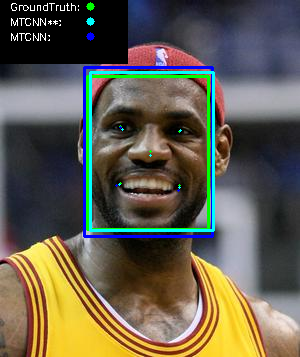

4
		left_mouth	right_mouth
Original: 6.9477742140647125 8.075802779901734
Altered: 2.356004078132275 3.0768029587758194


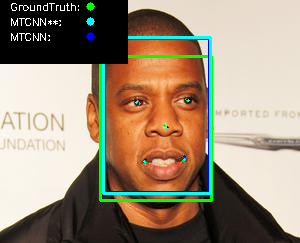

6
		left_mouth	right_mouth
Original: 7.479613663124693 5.68224372823212
Altered: 3.2141828026219295 4.938918902251714


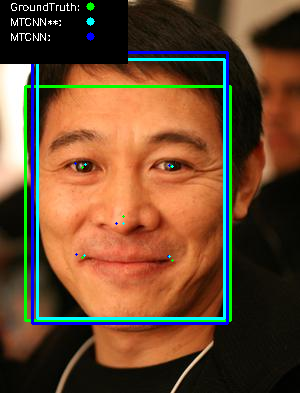

13
		left_mouth	right_mouth
Original: 3.5072399830813428 9.870951356378194
Altered: 5.64174422895307 10.800372255071585


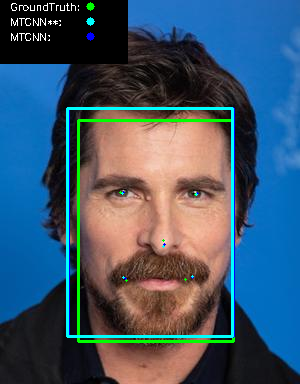

20
		left_mouth	right_mouth
Original: 7.416598459827381 4.178740274824125
Altered: 6.914599522528015 4.27448196358615


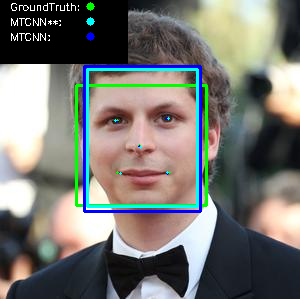

27
		left_mouth	right_mouth
Original: 6.435794564337705 7.292239089211676
Altered: 3.1956077587295018 6.484487997255709


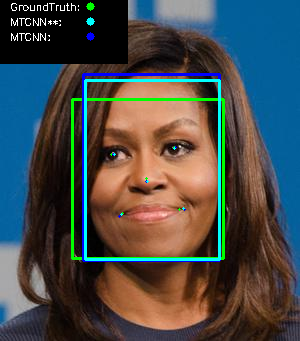

29
		left_mouth	right_mouth
Original: 2.0010139018171604 11.784370356507115
Altered: 1.3079012366797815 11.30565916579964


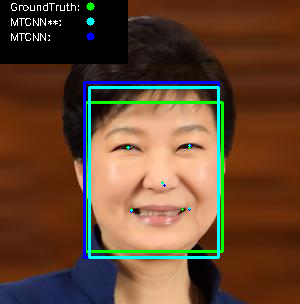

30
		left_mouth	right_mouth
Original: 8.908997917162662 0.9412295144711875
Altered: 8.146796543736432 1.1861404566709401


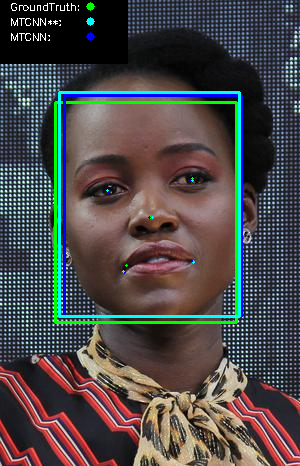

32
		left_mouth	right_mouth
Original: 2.408908521850721 7.5291643174721905
Altered: 3.80819986605277 8.606645416508849


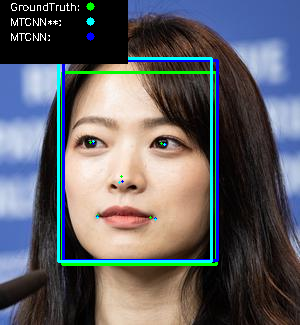

33
		left_mouth	right_mouth
Original: 5.514604808076974 7.897748265792183
Altered: 5.809744588544303 7.2172544149258515


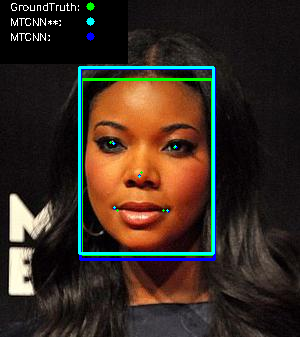

34
		left_mouth	right_mouth
Original: 7.931322079412053 5.7892502410283395
Altered: 16.85481345233458 14.123097659077471


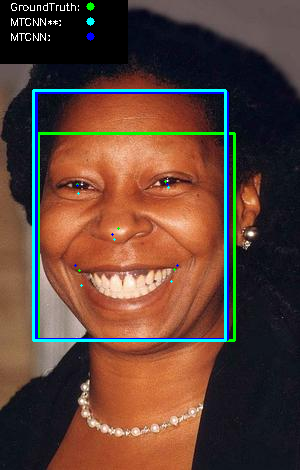

In [46]:
mtcnn_check(1,{'bounding_box': {'x': 90.12460327148438, 'y': 72.58246612548828, 'w': 123.00210571289062, 'h': 158.47203826904297}, 'landmarks': {'left_eye': [122.53153991699219, 129.2384490966797], 'right_eye': [180.845947265625, 130.930908203125], 'nose': [150.56649780273438, 155.80813598632812], 'left_mouth': [119.66727447509766, 184.35897827148438], 'right_mouth': [179.61172485351562, 187.11151123046875]}}
)
mtcnn_check(4,{'bounding_box': {'x': 103.03347778320312, 'y': 37.80769348144531, 'w': 107.98133850097656, 'h': 156.39222717285156}, 'landmarks': {'left_eye': [136.29640197753906, 102.37879943847656], 'right_eye': [188.59872436523438, 100.48210144042969], 'nose': [166.25498962402344, 128.15078735351562], 'left_mouth': [144.990234375, 161.45907592773438], 'right_mouth': [184.28045654296875, 159.34030151367188]}}
) 
mtcnn_check(6,{'bounding_box': {'x': 37.49345397949219, 'y': 59.2045783996582, 'w': 187.07810974121094, 'h': 259.97761154174805}, 'landmarks': {'left_eye': [85.24053955078125, 164.87066650390625], 'right_eye': [172.59326171875, 166.59974670410156], 'nose': [123.80876922607422, 223.38272094726562], 'left_mouth': [84.40428161621094, 255.10836791992188], 'right_mouth': [169.85037231445312, 256.5179138183594]}}
) 
mtcnn_check(13,{'bounding_box': {'x': 67.95745849609375, 'y': 108.96208953857422, 'w': 165.33721923828125, 'h': 228.16751861572266}, 'landmarks': {'left_eye': [122.12203216552734, 193.531005859375], 'right_eye': [196.55300903320312, 194.69444274902344], 'nose': [163.32943725585938, 246.00564575195312], 'left_mouth': [123.73646545410156, 277.3060302734375], 'right_mouth': [192.8179931640625, 276.2568359375]}}
) 
mtcnn_check(20,{'bounding_box': {'x': 87.32173919677734, 'y': 69.58282470703125, 'w': 110.59564971923828, 'h': 137.1009979248047}, 'landmarks': {'left_eye': [115.53622436523438, 120.99015808105469], 'right_eye': [168.81275939941406, 118.4671630859375], 'nose': [140.86058044433594, 147.19244384765625], 'left_mouth': [120.48451232910156, 173.05746459960938], 'right_mouth': [167.73855590820312, 172.58599853515625]}}
) 
mtcnn_check(27,{'bounding_box': {'x': 85.5417251586914, 'y': 80.02404022216797, 'w': 134.23238372802734, 'h': 179.1117935180664}, 'landmarks': {'left_eye': [114.04573059082031, 154.6827850341797], 'right_eye': [174.82366943359375, 148.85919189453125], 'nose': [147.8856658935547, 181.08468627929688], 'left_mouth': [121.04608154296875, 214.94142150878906], 'right_mouth': [183.88153076171875, 208.5931396484375]}}
) 
mtcnn_check(29,{'bounding_box': {'x': 89.4959945678711, 'y': 87.74180603027344, 'w': 129.6471939086914, 'h': 170.8039093017578}, 'landmarks': {'left_eye': [128.40367126464844, 147.6057891845703], 'right_eye': [189.53921508789062, 145.60357666015625], 'nose': [162.77621459960938, 183.6520538330078], 'left_mouth': [131.10134887695312, 210.54348754882812], 'right_mouth': [189.51730346679688, 208.68939208984375]}}
) 
mtcnn_check(30,{'bounding_box': {'x': 59.58981704711914, 'y': 92.92411041259766, 'w': 180.83567428588867, 'h': 224.86742401123047}, 'landmarks': {'left_eye': [107.53401184082031, 190.8865203857422], 'right_eye': [192.16500854492188, 180.49586486816406], 'nose': [152.55377197265625, 217.40826416015625], 'left_mouth': [123.27916717529297, 271.48101806640625], 'right_mouth': [193.23992919921875, 262.3239440917969]}}
) 
mtcnn_check(32,{'bounding_box': {'x': 58.420753479003906, 'y': 58.91004943847656, 'w': 153.41219329833984, 'h': 203.73890686035156}, 'landmarks': {'left_eye': [93.908935546875, 141.1341094970703], 'right_eye': [164.45632934570312, 144.0406494140625], 'nose': [119.78761291503906, 182.0548095703125], 'left_mouth': [97.13916778564453, 217.65744018554688], 'right_mouth': [155.70779418945312, 219.47244262695312]}}
) 
mtcnn_check(33,{'bounding_box': {'x': 79.56747436523438, 'y': 67.2940444946289, 'w': 134.25607299804688, 'h': 186.78723907470703}, 'landmarks': {'left_eye': [113.58139038085938, 143.5297393798828], 'right_eye': [175.3442840576172, 146.55368041992188], 'nose': [139.31039428710938, 176.68942260742188], 'left_mouth': [114.24037170410156, 207.90682983398438], 'right_mouth': [167.87539672851562, 210.4263916015625]}}
) 
mtcnn_check(34,{'bounding_box': {'x': 33.13034439086914, 'y': 90.92439270019531, 'w': 192.59177780151367, 'h': 250.36546325683594}, 'landmarks': {'left_eye': [78.37010192871094, 193.86622619628906], 'right_eye': [168.90396118164062, 187.8126220703125], 'nose': [114.34321594238281, 239.89076232910156], 'left_mouth': [81.180908203125, 285.269287109375], 'right_mouth': [171.8364715576172, 281.55743408203125]}}
) 
